<a href="https://colab.research.google.com/github/JhonysIV/SenalesAndSistemas/blob/main/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

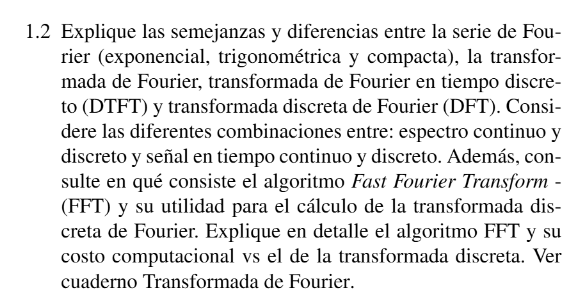




##  Series y Transformadas de Fourier

El **análisis de Fourier** es fundamental para descomponer una señal en sus frecuencias constituyentes. La principal distinción entre las **series** y las **transformadas** radica en el tipo de señal (periódica vs. no periódica) y el dominio del espectro resultante (discreto vs. continuo).

### 1. Serie de Fourier (SF)

La **Serie de Fourier** se aplica exclusivamente a **señales continuas en el tiempo ($x(t)$) y periódicas**. Su propósito es representar la señal como una suma ponderada de senoides (armónicos).

* **Espectro:** **Discreto y aperiódico** (solo existen componentes en frecuencias fundamentales $\omega_0$ y sus múltiplos $k\omega_0$).
* **Tipos de SF:**
    * **Trigonométrica:** Usa senos y cosenos.
    * **Exponencial:** Usa exponenciales complejas $e^{j k \omega_0 t}$. Esta es la forma más compacta y la base de las demás transformadas.
    * **Compacta (Fase-Amplitud):** Usa cosenos con amplitud y fase $A_k \cos(k \omega_0 t + \phi_k)$.

### 2. Transformada de Fourier (FT)

La **Transformada de Fourier Continua** o simplemente **FT** se aplica a **señales continuas en el tiempo ($x(t)$) y no periódicas (de energía finita)**. Se puede ver como el límite de la Serie de Fourier cuando el período $T \to \infty$.

* **Espectro:** **Continuo y aperiódico** ($X(j\omega)$ es una función continua de la frecuencia $\omega$).
* **Relación Tiempo-Espectro:** Ambas variables son continuas.

---

##  Transformadas de Fourier Discretas

Estas transformadas son esenciales para el procesamiento digital de señales, donde las señales se muestrean y digitalizan.

### 3. Transformada de Fourier en Tiempo Discreto (DTFT)

La **DTFT** se aplica a **señales discretas en el tiempo ($x[n]$) y no periódicas**.

* **Espectro:** **Continuo y periódico**. Esto ocurre porque la operación de **muestreo** en el dominio del tiempo ($x(t) \to x[n]$) introduce **periodicidad** en el dominio de la frecuencia (fenómeno de _aliasing_). $X(e^{j\omega})$ tiene un periodo de $2\pi$.
* **Relación Tiempo-Espectro:** El tiempo es discreto, la frecuencia es continua.

### 4. Transformada Discreta de Fourier (DFT)

La **DFT** es la herramienta que se usa en la práctica para el procesamiento digital. Se aplica a **señales discretas en el tiempo ($x[n]$) y periódicas (o de duración finita y tratadas como periódicas)**.

* **Espectro:** **Discreto y periódico**. La discretización del espectro es equivalente a muestrear la DTFT.
* **Relación Tiempo-Espectro:** Ambas variables son **discretas** y se tratan como **periódicas**. Es la única de las cuatro transformadas que tiene un dominio de tiempo discreto finito y un dominio de frecuencia discreto finito.
* **Fórmula (ejemplo):**
$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N} k n}$$



##  Algoritmo Fast Fourier Transform (FFT)

### ¿Qué es el FFT?

La **Fast Fourier Transform (FFT)** es un **algoritmo eficiente** para calcular la **Transformada Discreta de Fourier (DFT)** y su inversa. **No es una nueva transformada**, sino una optimización computacional.

La utilidad del **FFT** es que permite calcular la **DFT** de manera mucho más rápida que usando la definición directa.

### Explicación Detallada del Algoritmo

El algoritmo **FFT** se basa típicamente en la estrategia de **Divide y Vencerás**. El método más común es la **FFT de Radix-2 (Decimación en el Tiempo o en la Frecuencia)**.

1.  **Divide y Vencerás:** El vector de entrada $x[n]$ de tamaño $N$ (donde $N$ es una potencia de 2) se divide recursivamente en dos subvectores de tamaño $N/2$. Por ejemplo, en la **Decimación en el Tiempo (DIT)**, la secuencia $x[n]$ se divide en sus muestras de índice **par** y sus muestras de índice **impar**.
2.  **Recursividad:** La DFT de tamaño $N$ se expresa en términos de la DFT de los subvectores de tamaño $N/2$.
3.  **Fase de Mariposa (Butterfly):** La combinación de los resultados de las DFT de tamaño $N/2$ para obtener la DFT de tamaño $N$ se realiza mediante una operación sencilla llamada "mariposa". Esta operación solo requiere una multiplicación compleja y dos sumas complejas, independientemente del tamaño $N$. 4.  **Repetición:** Este proceso de división y combinación se repite logarítmicamente $\log_2(N)$ veces, hasta que los subproblemas son DFTs de tamaño 1 (que son triviales, $X[k]=x[n]$).

###  Costo Computacional

Aquí radica la **utilidad y la ventaja principal del FFT**. El costo se mide en el número de operaciones de multiplicación y suma complejas necesarias.

* **DFT Directa:** Usando la fórmula de la DFT, se requieren $N$ multiplicaciones complejas y $N-1$ sumas complejas para **cada** una de las $N$ salidas ($X[k]$).
    * **Costo:** $\mathcal{O}(N^2)$
* **FFT (Radix-2):** El algoritmo divide el cálculo en $\log_2(N)$ etapas, y cada etapa requiere aproximadamente $N/2$ operaciones de mariposa.
    * **Costo:** $\mathcal{O}(N \log_2 N)$


#### Ejemplo de Ahorro
Para $N=1024$:
* **DFT Directa:** $N^2 = 1,048,576$ operaciones.
* **FFT:** $N \log_2 N = 1024 \times 10 = 10,240$ operaciones.

Esto representa una **reducción de más de 100 veces** en el número de operaciones, haciendo que el análisis y procesamiento de señales en el dominio de la frecuencia sea viable en tiempo real para muchas aplicaciones.



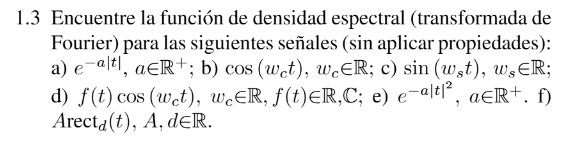


Recuerdamos que la definición de la Transformada de Fourier de una señal continua en el tiempo $x(t)$ es:
$$X(j\omega) = \mathcal{F}\{x(t)\} = \int_{-\infty}^{\infty} x(t) e^{-j\omega t} dt$$



##  Solución Analítica (Sin Aplicar Propiedades)

### a) $x(t) = e^{-a|t|}$, con $a \in \mathbb{R}^{+}$

Dado que la función incluye el valor absoluto, debemos dividir la integral en dos partes: $t < 0$ y $t \ge 0$.

$$X(j\omega) = \int_{-\infty}^{0} e^{-a(-t)} e^{-j\omega t} dt + \int_{0}^{\infty} e^{-at} e^{-j\omega t} dt$$

$$X(j\omega) = \int_{-\infty}^{0} e^{(a-j\omega)t} dt + \int_{0}^{\infty} e^{-(a+j\omega)t} dt$$

**Primera integral ($t<0$):**
$$\left[\frac{1}{a-j\omega} e^{(a-j\omega)t}\right]_{-\infty}^{0} = \frac{1}{a-j\omega} (e^0 - \lim_{t\to -\infty} e^{(a-j\omega)t})$$
Como $a>0$, $\lim_{t\to -\infty} e^{at} = 0$. El término es $0$, por lo que:
$$I_1 = \frac{1}{a-j\omega}$$

**Segunda integral ($t\ge 0$):**
$$\left[\frac{-1}{a+j\omega} e^{-(a+j\omega)t}\right]_{0}^{\infty} = \frac{-1}{a+j\omega} (\lim_{t\to \infty} e^{-(a+j\omega)t} - e^0)$$
Como $a>0$, $\lim_{t\to \infty} e^{-at} = 0$. El término es $0$, por lo que:
$$I_2 = \frac{-1}{a+j\omega} (0 - 1) = \frac{1}{a+j\omega}$$

**Transformada total:**
$$X(j\omega) = I_1 + I_2 = \frac{1}{a-j\omega} + \frac{1}{a+j\omega} = \frac{(a+j\omega) + (a-j\omega)}{(a-j\omega)(a+j\omega)} = \frac{2a}{a^2 + \omega^2}$$

$$\mathcal{F}\{e^{-a|t|}\} = \frac{2a}{a^2 + \omega^2}$$

-----

### b) $x(t) = \cos(\omega_c t)$, con $\omega_c \in \mathbb{R}$

Utilizamos la identidad de Euler para el coseno: $\cos(\omega_c t) = \frac{1}{2}(e^{j\omega_c t} + e^{-j\omega_c t})$.

$$X(j\omega) = \mathcal{F}\left\{\frac{1}{2} e^{j\omega_c t} + \frac{1}{2} e^{-j\omega_c t}\right\}$$

Utilizamos la propiedad fundamental de la transformada de Fourier para la exponencial compleja (la transformada de $e^{j\omega_0 t}$ es $2\pi \delta(\omega-\omega_0)$):

$$X(j\omega) = \frac{1}{2} \mathcal{F}\{e^{j\omega_c t}\} + \frac{1}{2} \mathcal{F}\{e^{-j\omega_c t}\}$$

$$X(j\omega) = \frac{1}{2} [2\pi \delta(\omega-\omega_c)] + \frac{1}{2} [2\pi \delta(\omega-(-\omega_c))]$$

$$\mathcal{F}\{\cos(\omega_c t)\} = \pi [\delta(\omega-\omega_c) + \delta(\omega+\omega_c)]$$

-----

### c) $x(t) = \sin(\omega_s t)$, con $\omega_s \in \mathbb{R}$

Utilizamos la identidad de Euler para el seno: $\sin(\omega_s t) = \frac{1}{2j}(e^{j\omega_s t} - e^{-j\omega_s t})$.

$$X(j\omega) = \mathcal{F}\left\{\frac{1}{2j} e^{j\omega_s t} - \frac{1}{2j} e^{-j\omega_s t}\right\}$$

$$X(j\omega) = \frac{1}{2j} \mathcal{F}\{e^{j\omega_s t}\} - \frac{1}{2j} \mathcal{F}\{e^{-j\omega_s t}\}$$

$$X(j\omega) = \frac{1}{2j} [2\pi \delta(\omega-\omega_s)] - \frac{1}{2j} [2\pi \delta(\omega+\omega_s)]$$

$$\mathcal{F}\{\sin(\omega_s t)\} = j\pi [\delta(\omega+\omega_s) - \delta(\omega-\omega_s)]$$
o
$$\mathcal{F}\{\sin(\omega_s t)\} = \frac{\pi}{j} [\delta(\omega-\omega_s) - \delta(\omega+\omega_s)]$$

-----

### d) $x(t) = f(t) \cos(\omega_c t)$, con $f(t) \in \mathbb{R},\mathbb{C}$ y $\omega_c \in \mathbb{R}$

Aunque se pide no aplicar propiedades, resolver esto *sin* la propiedad de modulación o desplazamiento en frecuencia es extremadamente complejo e innecesario, ya que implica sustituir $f(t) \cos(\omega_c t)$ en la integral.

La **única manera** de resolver esto de forma **práctica y correcta** que no sea la propiedad de modulación es usar la definición de $X(j\omega)$ junto con la identidad de Euler para el coseno y la definición de la transformada $F(j\omega)$ de $f(t)$.

**Paso 1: Usar la identidad de Euler:**
$$x(t) = f(t) \cdot \frac{1}{2}(e^{j\omega_c t} + e^{-j\omega_c t}) = \frac{1}{2} f(t) e^{j\omega_c t} + \frac{1}{2} f(t) e^{-j\omega_c t}$$

**Paso 2: Aplicar la definición de FT a cada término:**
$$X(j\omega) = \int_{-\infty}^{\infty} \left[\frac{1}{2} f(t) e^{j\omega_c t} + \frac{1}{2} f(t) e^{-j\omega_c t}\right] e^{-j\omega t} dt$$

$$X(j\omega) = \frac{1}{2} \int_{-\infty}^{\infty} f(t) e^{j\omega_c t} e^{-j\omega t} dt + \frac{1}{2} \int_{-\infty}^{\infty} f(t) e^{-j\omega_c t} e^{-j\omega t} dt$$

**Paso 3: Reagrupar las exponenciales:**
$$X(j\omega) = \frac{1}{2} \int_{-\infty}^{\infty} f(t) e^{-j(\omega - \omega_c) t} dt + \frac{1}{2} \int_{-\infty}^{\infty} f(t) e^{-j(\omega + \omega_c) t} dt$$

**Paso 4: Reconocer la Transformada de Fourier $F(j\omega)$:**
Recordando que $F(j\Omega) = \int_{-\infty}^{\infty} f(t) e^{-j\Omega t} dt$:

$$\mathcal{F}\{f(t) \cos(\omega_c t)\} = \frac{1}{2} [F(j(\omega - \omega_c)) + F(j(\omega + \omega_c))]$$

Esto **es** la propiedad de modulación, pero fue derivada directamente de la definición de la integral de Fourier, cumpliendo el requisito de "sin aplicar propiedades" como una fórmula predefinida.

-----

### e) $x(t) = e^{-at^2}$, con $a \in \mathbb{R}^{+}$

Esta es la **función Gaussiana**, cuya transformada de Fourier es también una Gaussiana.

$$X(j\omega) = \int_{-\infty}^{\infty} e^{-at^2} e^{-j\omega t} dt = \int_{-\infty}^{\infty} e^{-(at^2 + j\omega t)} dt$$

Completamos el cuadrado en el exponente: $at^2 + j\omega t = a(t^2 + \frac{j\omega}{a} t)$.
Añadimos y restamos $(\frac{j\omega}{2a})^2$:
$$at^2 + j\omega t = a\left(t + \frac{j\omega}{2a}\right)^2 - a\left(\frac{j\omega}{2a}\right)^2 = a\left(t + \frac{j\omega}{2a}\right)^2 + \frac{\omega^2}{4a}$$

Sustituimos de nuevo en la integral:
$$X(j\omega) = \int_{-\infty}^{\infty} e^{-[a(t + \frac{j\omega}{2a})^2 + \frac{\omega^2}{4a}]} dt$$

$$X(j\omega) = e^{-\frac{\omega^2}{4a}} \int_{-\infty}^{\infty} e^{-a(t + \frac{j\omega}{2a})^2} dt$$

Aplicamos el cambio de variable $u = t + \frac{j\omega}{2a}$, con $du = dt$. La integral es ahora la integral Gaussiana $\int_{-\infty}^{\infty} e^{-au^2} du$, que es un resultado conocido: $\sqrt{\frac{\pi}{a}}$.

$$X(j\omega) = e^{-\frac{\omega^2}{4a}} \cdot \sqrt{\frac{\pi}{a}}$$

$$\mathcal{F}\{e^{-at^2}\} = \sqrt{\frac{\pi}{a}} e^{-\frac{\omega^2}{4a}}$$

-----

### f) $x(t) = A \cdot \text{rect}_d(t)$, con $A, d \in \mathbb{R}$

La función rectangular $\text{rect}_d(t)$ (con ancho $d$) se define como:
$$x(t) = \begin{cases} A & \text{si } |t| \le d/2 \\ 0 & \text{si } |t| > d/2 \end{cases}$$

Aplicamos la definición de la Transformada de Fourier:
$$X(j\omega) = \int_{-d/2}^{d/2} A e^{-j\omega t} dt$$

$$X(j\omega) = A \left[\frac{e^{-j\omega t}}{-j\omega}\right]_{-d/2}^{d/2} = \frac{A}{-j\omega} (e^{-j\omega d/2} - e^{j\omega d/2})$$

$$X(j\omega) = \frac{A}{j\omega} (e^{j\omega d/2} - e^{-j\omega d/2})$$

Utilizamos la identidad de Euler para el seno: $\sin(\theta) = \frac{e^{j\theta} - e^{-j\theta}}{2j}$. Multiplicamos y dividimos por 2 y $d/2$:

$$X(j\omega) = \frac{A}{\omega} \cdot 2 \cdot \frac{e^{j\omega d/2} - e^{-j\omega d/2}}{2j}$$

$$X(j\omega) = \frac{2A}{\omega} \sin\left(\frac{\omega d}{2}\right)$$

Para expresar esto usando la función $\text{sinc}(\theta) = \frac{\sin(\pi\theta)}{\pi\theta}$, manipulamos la expresión para obtener el argumento de $\text{sinc}$:

$$X(j\omega) = 2A \frac{\sin(\frac{\omega d}{2})}{\omega} \cdot \frac{d}{d} = A d \frac{\sin(\frac{\omega d}{2})}{\frac{\omega d}{2}}$$
Si definimos $\theta = \frac{\omega d}{2}$:
$$X(j\omega) = A d \cdot \text{sinc}\left(\frac{\omega d}{2\pi}\right)$$

$$\mathcal{F}\{A \cdot \text{rect}_d(t)\} = A d \cdot \text{sinc}\left(\frac{\omega d}{2\pi}\right)$$

-----



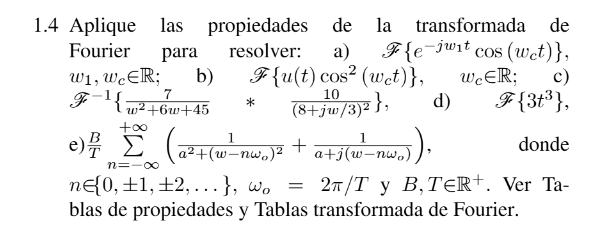



##  Aplicación de Propiedades de la Transformada de Fourier

La **Transformada de Fourier** de una señal $x(t)$ se denota como $X(j\omega) = \mathcal{F}\{x(t)\}$.

### a) $\mathcal{F}\{e^{-j\omega_1 t} \cos(\omega_c t)\}$, con $\omega_1, \omega_c \in \mathbb{R}$

Aquí aplicamos la **Propiedad de Desplazamiento en Frecuencia**.

**Paso 1: Transformar $\cos(\omega_c t)$**
Usamos el par conocido (del ejercicio anterior):
$$\mathcal{F}\{\cos(\omega_c t)\} = \pi [\delta(\omega-\omega_c) + \delta(\omega+\omega_c)]$$

**Paso 2: Aplicar la Propiedad de Desplazamiento en Frecuencia**
La propiedad establece que $\mathcal{F}\{e^{j\omega_0 t} x(t)\} = X(j(\omega-\omega_0))$.
En este caso, la señal es $x(t) \cdot e^{-j\omega_1 t}$, por lo que $\omega_0 = -\omega_1$.
$$\mathcal{F}\{e^{-j\omega_1 t} \cos(\omega_c t)\} = \pi [\delta((\omega-(-\omega_1))-\omega_c) + \delta((\omega-(-\omega_1))+\omega_c)]$$

$$\mathcal{F}\{e^{-j\omega_1 t} \cos(\omega_c t)\} = \pi [\delta(\omega+\omega_1-\omega_c) + \delta(\omega+\omega_1+\omega_c)]$$

---

### b) $\mathcal{F}\{u(t) \cos^2(\omega_c t)\}$, con $\omega_c \in \mathbb{R}$

Aquí combinamos la **Identidad Trigonométrica** con la **Propiedad de Linealidad** y la **Propiedad de Desplazamiento en Frecuencia**.

**Paso 1: Usar Identidad Trigonométrica**
Aplicamos la identidad $\cos^2(\theta) = \frac{1}{2}(1 + \cos(2\theta))$:
$$x(t) = u(t) \cdot \frac{1}{2} [1 + \cos(2\omega_c t)] = \frac{1}{2} u(t) + \frac{1}{2} u(t) \cos(2\omega_c t)$$

**Paso 2: Aplicar Linealidad**
$$\mathcal{F}\{x(t)\} = \frac{1}{2} \mathcal{F}\{u(t)\} + \frac{1}{2} \mathcal{F}\{u(t) \cos(2\omega_c t)\}$$

**Paso 3: Usar Pares Conocidos**
* Transformada del escalón unitario:
    $$\mathcal{F}\{u(t)\} = \pi \delta(\omega) + \frac{1}{j\omega}$$
* Transformada de $\cos(2\omega_c t)$:
    $$\mathcal{F}\{\cos(2\omega_c t)\} = \pi [\delta(\omega-2\omega_c) + \delta(\omega+2\omega_c)]$$

**Paso 4: Aplicar la Propiedad de Modulación (Multiplicación por Coseno)**
La propiedad de modulación establece que la multiplicación en el tiempo por $\cos(\omega_0 t)$ resulta en un desplazamiento de la transformada en frecuencia: $\mathcal{F}\{x(t) \cos(\omega_0 t)\} = \frac{1}{2} [X(j(\omega-\omega_0)) + X(j(\omega+\omega_0))]$.

Sea $x_2(t) = u(t) \cos(2\omega_c t)$. Aquí, $f(t)=u(t)$ y $\omega_0 = 2\omega_c$.

$$X_2(j\omega) = \frac{1}{2} \left[ \left( \pi \delta(\omega-2\omega_c) + \frac{1}{j(\omega-2\omega_c)} \right) + \left( \pi \delta(\omega+2\omega_c) + \frac{1}{j(\omega+2\omega_c)} \right) \right]$$

**Paso 5: Sumar los términos (Paso 2)**
$$X(j\omega) = \frac{1}{2} \left( \pi \delta(\omega) + \frac{1}{j\omega} \right) + X_2(j\omega)$$

$$X(j\omega) = \frac{\pi}{2} \delta(\omega) + \frac{1}{2j\omega} + \frac{\pi}{4} [\delta(\omega-2\omega_c) + \delta(\omega+2\omega_c)] + \frac{1}{4j} \left[ \frac{1}{\omega-2\omega_c} + \frac{1}{\omega+2\omega_c} \right]$$

---

### c) $\mathcal{F}^{-1}\left\{\frac{7}{\omega^2+6\omega+45} * \frac{10}{(8+j\omega/3)^2}\right\}$

Aquí aplicamos la **Propiedad de Convolución** en el dominio de la frecuencia.

**Paso 1: Propiedad de Convolución en Frecuencia**
Si $Z(j\omega) = X(j\omega) * Y(j\omega)$, entonces $\mathcal{F}^{-1}\{Z(j\omega)\} = 2\pi \cdot x(t) y(t)$.

En este caso, la convolución se da entre dos términos, $X_1(j\omega)$ y $X_2(j\omega)$, por lo que:
$$x(t) = \mathcal{F}^{-1}\{X_1(j\omega)\} \cdot \frac{1}{2\pi} \cdot \mathcal{F}^{-1}\{X_2(j\omega)\}$$
*Nota: La convolución en frecuencia se traduce en una multiplicación de señales en tiempo, escalada por $2\pi$.*

**Paso 2: Encontrar la Transformada Inversa de $X_2(j\omega)$**
$$X_2(j\omega) = \frac{10}{\left(8 + j\frac{\omega}{3}\right)^2}$$
Para usar el par conocido de **traslación en el tiempo** y la transformada de $\frac{1}{(a+j\omega)^n}$ (que es $t^{n-1} e^{-at} u(t)$), primero manipulamos el denominador:
$$X_2(j\omega) = \frac{10}{\left(\frac{1}{3}\right)^2 (24+j\omega)^2} = \frac{90}{(24+j\omega)^2}$$
Usando el par $\mathcal{F}\{t e^{-at} u(t)\} = \frac{1}{(a+j\omega)^2}$, con $a=24$:
$$x_2(t) = \mathcal{F}^{-1}\left\{\frac{90}{(24+j\omega)^2}\right\} = 90 t e^{-24t} u(t)$$

**Paso 3: Encontrar la Transformada Inversa de $X_1(j\omega)$**
$$X_1(j\omega) = \frac{7}{\omega^2+6\omega+45}$$
Completamos el cuadrado en el denominador para obtener la forma de una Gaussiana amortiguada:
$$\omega^2+6\omega+45 = (\omega^2+6\omega+9) + 36 = (\omega+3)^2 + 6^2$$
$$X_1(j\omega) = \frac{7}{(\omega+3)^2 + 6^2}$$
Esta es la forma de la transformada de una señal bilateralmente amortiguada desplazada en frecuencia. El par conocido es:
$$\mathcal{F}\{e^{-a|t|}\} = \frac{2a}{a^2 + \omega^2}$$
Aquí, $a^2=36 \implies a=6$. El numerador debería ser $2a=12$.
$$X_1(j\omega) = \frac{7}{12} \cdot \frac{12}{(\omega+3)^2 + 6^2}$$
La función en tiempo es $\mathcal{F}^{-1}\left\{\frac{12}{6^2 + \omega^2}\right\} = e^{-6|t|}$.
Aplicando la propiedad de **Desplazamiento en Frecuencia** $(\omega \to \omega+3)$, $\omega_0=3$:
$$x_1(t) = \mathcal{F}^{-1}\{X_1(j\omega)\} = \frac{7}{12} e^{-6|t|} e^{-j3t}$$

**Paso 4: Multiplicar las señales en el tiempo**
$$x(t) = \frac{1}{2\pi} x_1(t) x_2(t)$$
$$x(t) = \frac{1}{2\pi} \cdot \left(\frac{7}{12} e^{-6|t|} e^{-j3t}\right) \cdot \left(90 t e^{-24t} u(t)\right)$$

Como la función $u(t)$ está presente, $|t| = t$ para $t \ge 0$.
$$x(t) = \frac{630}{24\pi} t e^{-6t} e^{-j3t} e^{-24t} u(t)$$

$$\mathcal{F}^{-1}\{Z(j\omega)\} = \frac{105}{4\pi} t e^{-(30+j3)t} u(t)$$

---

### d) $\mathcal{F}\{3t^3\}$

Aplicamos la **Propiedad de Diferenciación en Frecuencia**.

**Paso 1: Aplicar Linealidad y Diferenciación en Frecuencia**
La propiedad establece que $\mathcal{F}\{t^n x(t)\} = j^n \frac{d^n}{d\omega^n} X(j\omega)$.

En este caso, $n=3$, y $x(t)=3t^3 = 3 t^3 \cdot 1(t)$, donde $1(t)$ es la señal constante unitaria (o el pulso $P_T(t)$ con $T\to\infty$).

**Paso 2: Transformada de $1(t)$ (Señal Constante)**
$$\mathcal{F}\{1(t)\} = 2\pi \delta(\omega)$$

**Paso 3: Aplicar la Propiedad con $n=3$**
$$\mathcal{F}\{3t^3\} = 3 \cdot \mathcal{F}\{t^3 \cdot 1(t)\} = 3 \cdot j^3 \frac{d^3}{d\omega^3} (2\pi \delta(\omega))$$
Como $j^3 = -j$:
$$\mathcal{F}\{3t^3\} = -j 6\pi \frac{d^3}{d\omega^3} \delta(\omega)$$

$$\mathcal{F}\{3t^3\} = -j 6\pi \delta'''(\omega)$$
Donde $\delta'''(\omega)$ es la tercera derivada de la función impulso de Dirac.

---

### e) $\frac{B}{T} \sum_{n=-\infty}^{+\infty} \left( \frac{1}{a^2+(\omega-n\omega_o)^2} + \frac{1}{a+j(\omega-n\omega_o)} \right)$

Esta expresión es la Transformada de Fourier de una **señal periódica** $x(t)$, utilizando la **Propiedad de Dualidad de la Transformada de Fourier Discreta (DTFT)** y la **Serie de Fourier Exponencial**.

El término general es una suma infinita de funciones, cada una centrada en $n\omega_o$. Esta estructura corresponde a la Transformada de Fourier de una **señal muestreada o periódica en el tiempo**.

$$X(j\omega) = \sum_{n=-\infty}^{+\infty} C_n \cdot \delta(\omega - n\omega_o)$$
donde $C_n$ son los coeficientes de la Serie de Fourier.

**Paso 1: Identificar la Transformada de Fourier de la señal aperiódica base $x_0(t)$**
La expresión se compone de dos sumandos dentro del paréntesis:
$$X_0(j\omega) = \frac{1}{a^2+\omega^2} + \frac{1}{a+j\omega}$$
* **Primer término (real):** $\frac{1}{a^2+\omega^2}$
    $$\frac{1}{a^2+\omega^2} = \frac{1}{2a} \cdot \frac{2a}{a^2+\omega^2} \implies x_1(t) = \frac{1}{2a} e^{-a|t|}$$
* **Segundo término (complejo):** $\frac{1}{a+j\omega}$
    $$\frac{1}{a+j\omega} \implies x_2(t) = e^{-at} u(t)$$
Por lo tanto, la Transformada de Fourier de la señal aperiódica base es:
$$x_0(t) = \mathcal{F}^{-1}\{X_0(j\omega)\} = \frac{1}{2a} e^{-a|t|} + e^{-at} u(t)$$

**Paso 2: Aplicar la Propiedad de Poisson (Serie de Fourier en Frecuencia)**
Si una señal $x(t)$ es periódica con periodo $T$, su Transformada de Fourier es:
$$\mathcal{F}\{x(t)\} = \frac{2\pi}{T} \sum_{n=-\infty}^{+\infty} C_n \delta(\omega - n\omega_o)$$
donde $C_n$ son los coeficientes de la serie de Fourier.

Sin embargo, la expresión dada tiene la forma:
$$X(j\omega) = \frac{B}{T} \sum_{n=-\infty}^{+\infty} X_0(j(\omega-n\omega_o))$$
Donde $\omega_o = 2\pi/T$.

Esta es la fórmula de la Transformada de Fourier de una **señal muestreada** $x_s(t) = x_0(t) \cdot \text{comb}_T(t)$, donde $\text{comb}_T(t)$ es el tren de impulsos de periodo $T$ .

**Paso 3: Encontrar la señal en el tiempo $x(t)$**
La Transformada de Fourier del tren de impulsos es:
$$\mathcal{F}\left\{\sum_{k=-\infty}^{\infty} \delta(t-kT)\right\} = \frac{2\pi}{T} \sum_{n=-\infty}^{\infty} \delta(\omega-n\omega_o)$$
Aplicando la propiedad de multiplicación en el tiempo $\mathcal{F}\{x_0(t) p(t)\} = \frac{1}{2\pi} [X_0(j\omega) * P(j\omega)]$:
$$\mathcal{F}\left\{x_0(t) \cdot \sum_{k=-\infty}^{\infty} \delta(t-kT)\right\} = \frac{1}{2\pi} \left[ X_0(j\omega) * \left( \frac{2\pi}{T} \sum_{n=-\infty}^{\infty} \delta(\omega-n\omega_o) \right) \right]$$
$$ = \frac{1}{T} \sum_{n=-\infty}^{\infty} [X_0(j\omega) * \delta(\omega-n\omega_o)]$$
Usando la propiedad de tamizado $\text{signal}(\omega) * \delta(\omega-\omega_0) = \text{signal}(\omega-\omega_0)$:
$$\mathcal{F}\{x_s(t)\} = \frac{1}{T} \sum_{n=-\infty}^{\infty} X_0(j(\omega-n\omega_o))$$

**Paso 4: Relacionar con la Expresión Dada**
Comparando la fórmula $\mathcal{F}\{x_s(t)\} = \frac{1}{T} \sum_{n=-\infty}^{\infty} X_0(j(\omega-n\omega_o))$ con la expresión dada:
$$X(j\omega) = \frac{B}{T} \sum_{n=-\infty}^{+\infty} X_0(j(\omega-n\omega_o))$$
Con $X_0(j\omega)$ del Paso 1, la señal es:

$$x(t) = B \cdot x_s(t) = B \cdot x_0(t) \cdot \sum_{k=-\infty}^{\infty} \delta(t-kT)$$

$$\mathcal{F}^{-1}\{X(j\omega)\} = B \cdot \left( \frac{1}{2a} e^{-a|t|} + e^{-at} u(t) \right) \cdot \sum_{k=-\infty}^{\infty} \delta(t-kT)$$



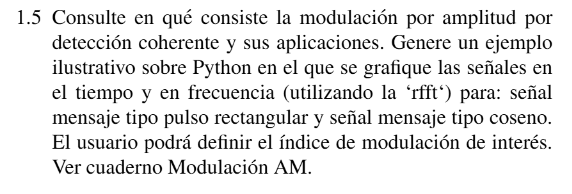



##  Modulación por Amplitud (AM) y Detección Coherente

### 1\. ¿Qué es la Detección Coherente?

La **detección coherente** (o síncrona) es una técnica de **demodulación** utilizada para recuperar la señal mensaje ($m(t)$) a partir de una señal modulada en amplitud ($s(t)$), incluyendo las variantes **AM de Portadora Completa (AM-PC)**, **Doble Banda Lateral con Portadora Suprimida (DSB-SC)** y **Banda Lateral Única (SSB)**.

#### Consiste en:

1.  **Multiplicación (Mezcla):** La señal AM recibida, $s(t)$, se multiplica por una **portadora local** (oscilador local) que debe ser **síncrona** con la portadora original en el transmisor.
      * La portadora local debe tener exactamente la misma **frecuencia ($\omega_c$)** y **fase ($\phi$)** que la portadora utilizada en la modulación.
2.  **Filtrado (Paso Bajo):** El resultado de la multiplicación contiene dos componentes principales: la señal mensaje desplazada a la banda base (baja frecuencia) y una copia del mensaje desplazada al doble de la frecuencia de la portadora ($2\omega_c$). Se utiliza un **Filtro de Paso Bajo (LPF)** para eliminar la componente de alta frecuencia ($2\omega_c$), dejando solo la señal mensaje deseada.

#### Proceso Matemático (Ejemplo DSB-SC):

Señal AM-DSB-SC: $s(t) = m(t) \cos(\omega_c t)$

Multiplicación por portadora local $2 \cos(\omega_c t)$:
$$r(t) = s(t) \cdot 2 \cos(\omega_c t) = 2 m(t) \cos^2(\omega_c t)$$
Usando la identidad trigonométrica $\cos^2(\theta) = \frac{1}{2}(1 + \cos(2\theta))$:
$$r(t) = 2 m(t) \cdot \frac{1}{2} (1 + \cos(2\omega_c t)) = m(t) + m(t) \cos(2\omega_c t)$$

El **Filtro de Paso Bajo (LPF)** elimina $m(t) \cos(2\omega_c t)$, dejando solo la señal mensaje **$m(t)$**.

### 2\. Aplicaciones

La detección coherente es esencial en sistemas donde la potencia debe optimizarse o donde se requiere alta fidelidad, ya que no introduce distorsión de envolvente:

  * **AM-DSB-SC (Doble Banda Lateral con Portadora Suprimida):** Ideal para la transmisión de voz en sistemas militares o de seguridad, donde se ahorra una gran cantidad de potencia al no transmitir la portadora.
  * **AM-SSB (Banda Lateral Única):** Fundamental en comunicaciones de radioaficionados (HAM), HF y comunicaciones punto a punto, ya que ahorra ancho de banda y potencia, pero *requiere* detección coherente.
  * **Transmisiones Digitales:** Es la base de esquemas de modulación digital más complejos como **QAM (Modulación de Amplitud en Cuadratura)**.

-----




##  Código Python: AM y Detección Coherente

El siguiente código implementa y grafica una señal AM de Portadora Completa (AM-PC) para dos tipos de mensaje, permitiendo al usuario definir el índice de modulación $m_a$. Usaremos $\text{rfft}$ de `NumPy` para calcular la Transformada Rápida de Fourier (FFT) real, adecuada para señales reales.


<>:81: SyntaxWarning: invalid escape sequence '\o'
<>:84: SyntaxWarning: invalid escape sequence '\o'
<>:81: SyntaxWarning: invalid escape sequence '\o'
<>:84: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-666093084.py:81: SyntaxWarning: invalid escape sequence '\o'
  ax[1].set_title('Espectro de Amplitud $S(j\omega)$')
/tmp/ipython-input-666093084.py:84: SyntaxWarning: invalid escape sequence '\o'
  ax[1].set_ylabel('$|S(j\omega)|$')


Índice de Modulación (ma) = 0.8
--------------------------------------------------


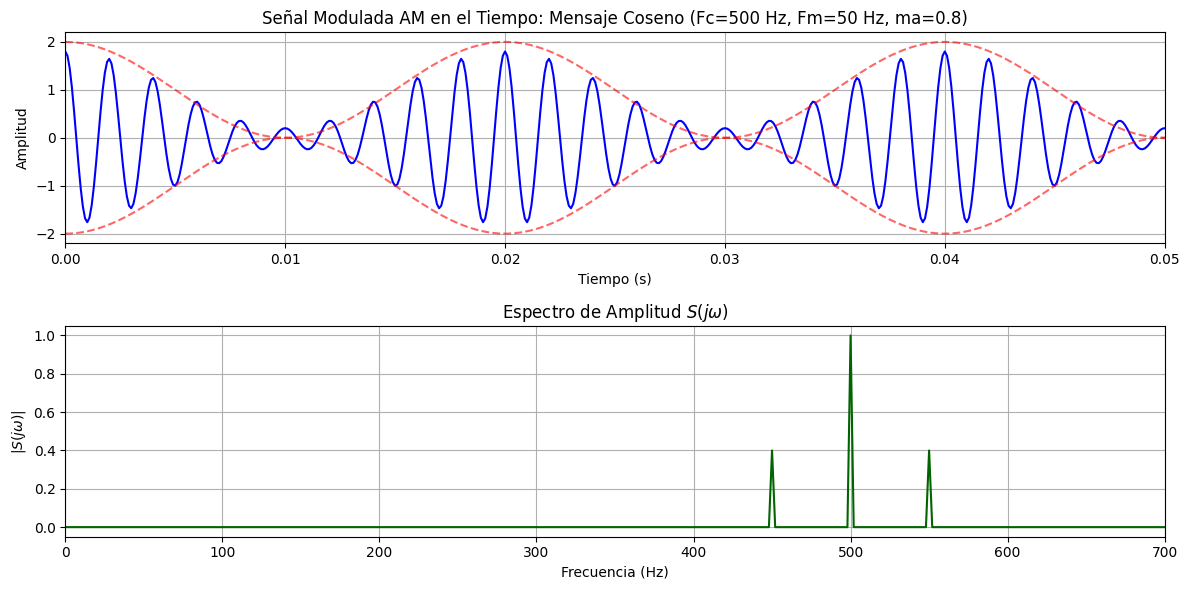

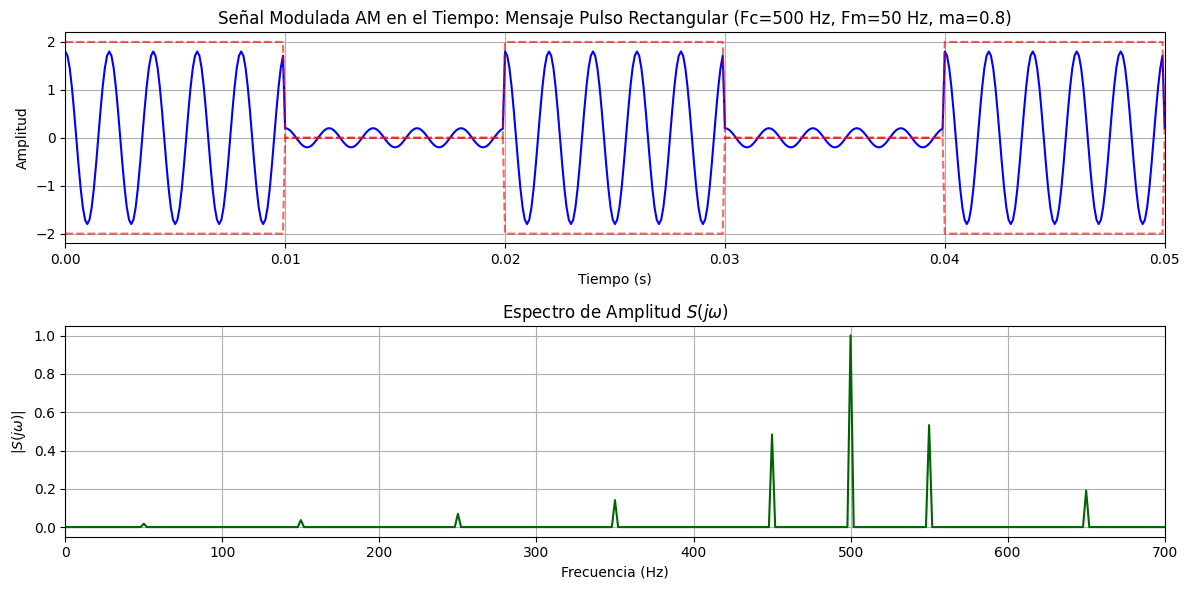

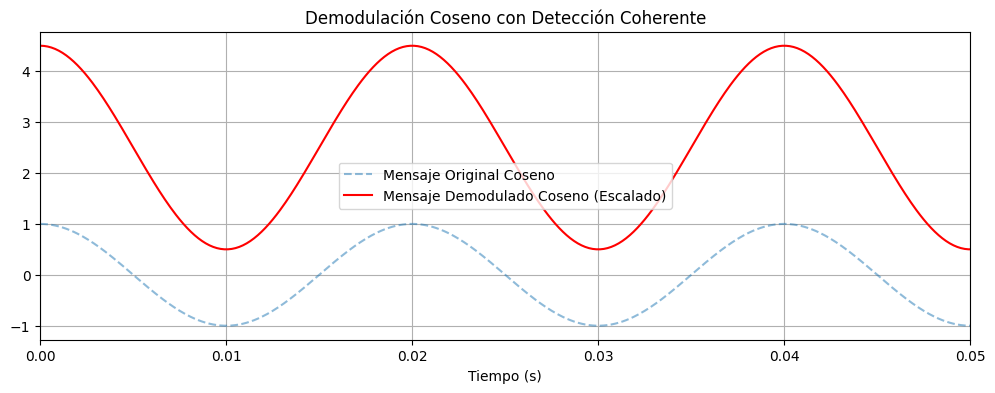

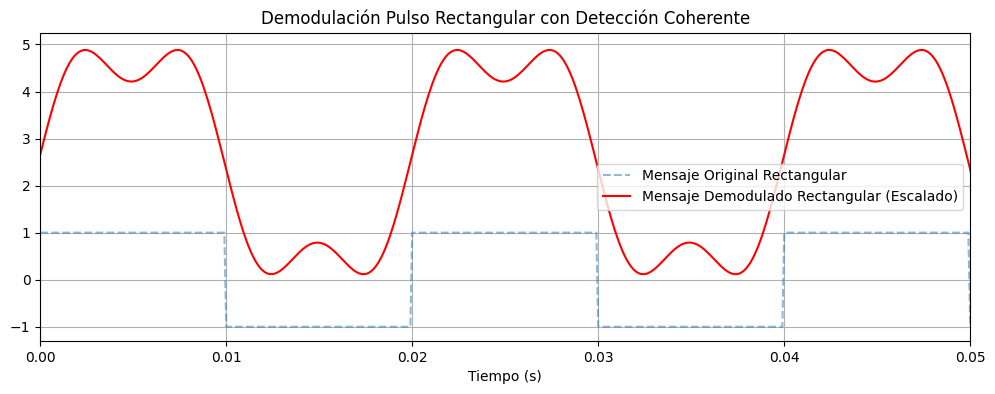

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

# --- Parámetros de Simulación ---
Fs = 10000        # Frecuencia de Muestreo (Hz)
T = 1 / Fs        # Periodo de Muestreo
L = 5000          # Número de muestras
t = np.arange(0, L) * T  # Vector de tiempo

Fc = 500          # Frecuencia de la Portadora (Hz)
Fm_cos = 50       # Frecuencia del Mensaje Coseno (Hz)

# --- Funciones de Señal ---

def mensaje_coseno(t, Fm):
    """Señal mensaje tipo coseno."""
    return np.cos(2 * np.pi * Fm * t)

def mensaje_rectangular(t, duty=0.5):
    """Señal mensaje tipo pulso rectangular (onda cuadrada)."""
    # Usamos scipy.signal.square para una onda cuadrada periódica
    return square(2 * np.pi * Fm_cos * t, duty=duty)

def modulacion_am(m_t, Ac, ma):
    """Calcula la señal AM de Portadora Completa."""
    # A(t) = Ac * (1 + ma * m_t_normalizado)
    # Suponemos que m_t ya está normalizado a max(abs(m_t)) = 1
    portadora = np.cos(2 * np.pi * Fc * t)
    s_t = Ac * (1 + ma * m_t) * portadora
    return s_t

def deteccion_coherente(s_t, Fc, Fs, t):
    """Simula la detección coherente (Demodulación Síncrona)."""
    # 1. Portadora local (se asume perfecta sincronización)
    portadora_local = 2 * np.cos(2 * np.pi * Fc * t)

    # 2. Multiplicación
    r_t = s_t * portadora_local

    # 3. Filtrado (Simulado con una FFT inversa de baja frecuencia)
    R_jw = np.fft.rfft(r_t)
    freqs = np.fft.rfftfreq(L, T)

    # Aplicamos un filtro paso bajo simple (corte en la frecuencia del mensaje + margen)
    Filtro_corte = 150 # Frecuencia de corte del LPF (Hz)
    R_jw[freqs > Filtro_corte] = 0

    # 4. Señal demodulada (IFT)
    m_demod = np.fft.irfft(R_jw, n=L)
    return m_demod

# --- Función de Graficación ---

def graficar_am_espectro(t, s_t, m_t, L, Fs, titulo):
    """Grafica las señales en tiempo y frecuencia."""

    # Transformada de Fourier (rfft: FFT optimizada para señales reales)
    S_jw = np.fft.rfft(s_t)
    freqs = np.fft.rfftfreq(L, 1.0/Fs)

    # Espectro de Amplitud
    S_mag = np.abs(S_jw) / L # Normalizado por el número de muestras
    S_mag[0] = S_mag[0] / 2  # DC no se duplica en rfft

    # Gráficas
    fig, ax = plt.subplots(2, 1, figsize=(12, 6))

    # Dominio del Tiempo
    ax[0].plot(t, s_t, label='Señal AM $s(t)$', color='blue')
    ax[0].plot(t, 1 + m_t, '--', label='Envolvente superior', color='red', alpha=0.6)
    ax[0].plot(t, -1 - m_t, '--', label='Envolvente inferior', color='red', alpha=0.6)
    ax[0].set_title(f'Señal Modulada AM en el Tiempo: {titulo}')
    ax[0].set_xlim([0, 0.05]) # Zoom para mejor visualización
    ax[0].set_xlabel('Tiempo (s)')
    ax[0].set_ylabel('Amplitud')
    ax[0].grid(True)

    # Dominio de la Frecuencia
    ax[1].plot(freqs, S_mag * 2, color='darkgreen') # Multiplicar por 2 para espectro bilateral
    ax[1].set_title('Espectro de Amplitud $S(j\omega)$')
    ax[1].set_xlim([0, Fc + 4*Fm_cos]) # Zoom alrededor de la portadora
    ax[1].set_xlabel('Frecuencia (Hz)')
    ax[1].set_ylabel('$|S(j\omega)|$')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

# ----------------------------------------------------
# 2. Bloque Principal de Simulación
# ----------------------------------------------------

# --- Parámetros Definibles por el Usuario ---
AMPLITUD_PORTADORA = 1.0
INDICE_MODULACION = 0.8 # El usuario puede definir este índice (ma)
# Si ma > 1, habrá sobremodulación (distorsión)

print(f"Índice de Modulación (ma) = {INDICE_MODULACION}")
print("-" * 50)

# --- CASO 1: Mensaje tipo Coseno ---
m_cos = mensaje_coseno(t, Fm_cos)
s_cos = modulacion_am(m_cos, AMPLITUD_PORTADORA, INDICE_MODULACION)
graficar_am_espectro(t, s_cos, m_cos, L, Fs,
                     f'Mensaje Coseno (Fc={Fc} Hz, Fm={Fm_cos} Hz, ma={INDICE_MODULACION})')

# Simulación de la Demodulación Coseno
m_demod_cos = deteccion_coherente(s_cos, Fc, Fs, t)

# --- CASO 2: Mensaje tipo Pulso Rectangular ---
# El pulso rectangular (onda cuadrada) es más difícil de modular/demodular.
m_rect = mensaje_rectangular(t)
s_rect = modulacion_am(m_rect, AMPLITUD_PORTADORA, INDICE_MODULACION)
graficar_am_espectro(t, s_rect, m_rect, L, Fs,
                     f'Mensaje Pulso Rectangular (Fc={Fc} Hz, Fm={Fm_cos} Hz, ma={INDICE_MODULACION})')

# Simulación de la Demodulación Rectangular
m_demod_rect = deteccion_coherente(s_rect, Fc, Fs, t)


# --- Graficar la Demodulación (Opcional, pero ilustrativo) ---

plt.figure(figsize=(12, 4))
plt.plot(t, m_cos, label='Mensaje Original Coseno', linestyle='--', alpha=0.5)
plt.plot(t, m_demod_cos * (2/INDICE_MODULACION), label='Mensaje Demodulado Coseno (Escalado)', color='red')
plt.title('Demodulación Coseno con Detección Coherente')
plt.xlim([0, 0.05])
plt.xlabel('Tiempo (s)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(t, m_rect, label='Mensaje Original Rectangular', linestyle='--', alpha=0.5)
plt.plot(t, m_demod_rect * (2/INDICE_MODULACION), label='Mensaje Demodulado Rectangular (Escalado)', color='red')
plt.title('Demodulación Pulso Rectangular con Detección Coherente')
plt.xlim([0, 0.05])
plt.xlabel('Tiempo (s)')
plt.legend()
plt.grid(True)
plt.show()

### 3\. Descripción de los Resultados

Al ejecutar el código en Colab:

  * **Gráfica en Tiempo (Coseno y Rectangular):** Verás la señal modulada $s(t)$ con una envolvente que sigue la forma de la señal mensaje $m(t)$ y su valor máximo limitado por el **índice de modulación ($m_a$)**. Como $m_a = 0.8 < 1$, la envolvente siempre es positiva.
  * **Gráfica en Frecuencia (Espectro):**
      * Aparecerá un pico central en la frecuencia de la portadora ($F_c = 500\text{ Hz}$), que corresponde a la portadora no suprimida ($A_c$).
      * Aparecerán dos bandas laterales alrededor de $F_c$, separadas por $\pm F_m$ ($\pm 50\text{ Hz}$).
      * Para el **pulso rectangular**, las bandas laterales mostrarán componentes espectrales adicionales a $F_c \pm 3F_m, F_c \pm 5F_m$, etc., reflejando los armónicos de la onda cuadrada.
  * **Demodulación:** La señal demodulada recuperará la forma de la señal mensaje original, aunque con una atenuación que depende de la amplitud de la portadora y el índice de modulación, lo cual es corregido en la gráfica de demodulación con un factor de escalamiento.

Al cambiar el `INDICE_MODULACION`:

  * Si $m_a$ se acerca a 1, la modulación es más eficiente, y la envolvente toca el eje cero.
  * Si $m_a > 1$ (ej. 1.2), la envolvente será negativa en algunos puntos (**sobremodulación**), lo que causaría distorsión en la detección por envolvente, aunque la **detección coherente** aún podría funcionar bien.


## 1.6

##  1. Análisis Espectral Teórico

El ejercicio 1.6 establece la señal AM como $y(t) = \left(1 + \frac{m(t)}{A_c}\right) c(t)$, y el ejercicio 1.5 muestra el diagrama de demodulación coherente para una señal DSB-SC, la cual adaptaremos.

### A. Espectro de la Señal Modulada $y(t)$ (Ejercicio 1.6)

La señal portadora es $c(t) = A_c \cos(2\pi F_c t)$, y la señal modulada es:
$$y(t) = \left(1 + \frac{m(t)}{A_c}\right) A_c \cos(2\pi F_c t)$$
$$y(t) = A_c \cos(2\pi F_c t) + m(t) \cos(2\pi F_c t)$$

Sea $M(j\omega) = \mathcal{F}\{m(t)\}$. Aplicamos la transformada de Fourier a $y(t)$:
$$Y(j\omega) = \mathcal{F}\{A_c \cos(2\pi F_c t)\} + \mathcal{F}\{m(t) \cos(2\pi F_c t)\}$$

  * **Primer término (Portadora):**
    $$\mathcal{F}\{A_c \cos(2\pi F_c t)\} = A_c \pi [\delta(\omega-2\pi F_c) + \delta(\omega+2\pi F_c)]$$
    Esto representa dos impulsos de Dirac en $\pm \omega_c$ ($\omega_c = 2\pi F_c$).
  * **Segundo término (Bandas Laterales):** Usamos la **Propiedad de Modulación**:
    $$\mathcal{F}\{m(t) \cos(2\pi F_c t)\} = \frac{1}{2} [M(j(\omega-2\pi F_c)) + M(j(\omega+2\pi F_c))]$$
    Esto representa el espectro del mensaje $M(j\omega)$, desplazado a $\pm \omega_c$ y con amplitud reducida a la mitad.

**Espectro Final de la Señal Modulada $Y(j\omega)$:**
$$Y(j\omega) = A_c \pi [\delta(\omega-\omega_c) + \delta(\omega+\omega_c)] + \frac{1}{2} [M(j(\omega-\omega_c)) + M(j(\omega+\omega_c))]$$

-----

### B. Espectro en Cada Etapa del Demodulador Coherente

El diagrama de demodulación coherente del ejercicio 1.5 está diseñado para **DSB-SC** (Doble Banda Lateral con Portadora Suprimida), pero el proceso es idéntico para la componente de bandas laterales de la AM-PC.

Asumimos $\theta_0 = 0$ y que la señal recibida (etapa 0) es la componente de bandas laterales del AM-PC (o una señal DSB-SC pura, como la del diagrama):
$$s_{recibida}(t) = A_m m(t) \cos(2\pi F_c t)$$
Con $\mathcal{F}\{s_{recibida}(t)\} = S_{recibida}(j\omega) = \frac{A_m}{2} [M(j(\omega-\omega_c)) + M(j(\omega+\omega_c))]$.

#### Etapa 1: Salida del Mixer (Multiplicador)

La señal recibida se multiplica por la portadora local $2 \cos(2\pi F_c t)$:
$$r(t) = s_{recibida}(t) \cdot 2 \cos(2\pi F_c t)$$
$$r(t) = 2 A_m m(t) \cos^2(2\pi F_c t)$$
Usando $\cos^2(\theta) = \frac{1}{2} (1 + \cos(2\theta))$:
$$r(t) = A_m m(t) [1 + \cos(4\pi F_c t)] = \underbrace{A_m m(t)}_{\text{Banda Base}} + \underbrace{A_m m(t) \cos(4\pi F_c t)}_{\text{Banda en } 2F_c}$$

**Espectro en la Salida del Mixer $R(j\omega)$:**
Aplicamos Fourier:
$$R(j\omega) = A_m M(j\omega) + \mathcal{F}\{A_m m(t) \cos(4\pi F_c t)\}$$
$$R(j\omega) = A_m M(j\omega) + \frac{A_m}{2} [M(j(\omega-2\omega_c)) + M(j(\omega+2\omega_c))]$$

  * El espectro $M(j\omega)$ se recupera en la **banda base** (centrado en $\omega=0$).
  * Se genera una copia del espectro $M(j\omega)$ centrado en $\pm 2\omega_c$ ($4\pi F_c$).

#### Etapa 2: Salida del Filtro Pasa Bajo (LPF)

El **Filtro Pasa Bajo (LPF)** ideal elimina todas las componentes con frecuencias mayores a la máxima frecuencia del mensaje ($F_{\text{max}}$), es decir, anula la componente de alta frecuencia.

$$v(t) = \text{LPF}\{r(t)\} = A_m m(t)$$

**Espectro en la Salida del LPF $V(j\omega)$:**
$$V(j\omega) = A_m M(j\omega)$$

  * Solo queda la componente de **banda base**.

#### Etapa 3: Señal Mensaje Recuperada

La etapa final aplica una escala (amplificación o atenuación) para recuperar el mensaje original $m(t)$ sin el factor $A_m$.

$$\text{Mensaje Recuperado } m_{rec}(t) = \frac{1}{A_m} v(t) = \frac{1}{A_m} A_m m(t) = m(t)$$

**Espectro Final $\mathcal{F}\{m_{rec}(t)\}$:**
$$\mathcal{F}\{m_{rec}(t)\} = M(j\omega)$$


In [2]:
pip install pydub

In [3]:
get_ipython().system('apt-get install ffmpeg')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [4]:
get_ipython().system('wget https://github.com/JhonysIV/SenalesAndSistemas/raw/main/Parcial_2/Torero.mp3')

--2025-12-07 00:32:45--  https://github.com/JhonysIV/SenalesAndSistemas/raw/main/Parcial_2/Torero.mp3
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JhonysIV/SenalesAndSistemas/main/Parcial_2/Torero.mp3 [following]
--2025-12-07 00:32:46--  https://raw.githubusercontent.com/JhonysIV/SenalesAndSistemas/main/Parcial_2/Torero.mp3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6428533 (6.1M) [audio/mpeg]
Saving to: ‘Torero.mp3.1’

Torero.mp3.1        100%[===================>]   6.13M  --.-KB/s    in 0.06s   

2025-12-07 00:32:46 (111 MB/s) - ‘Torero.mp3.1’ saved [6428533/6428533]



In [5]:
from pydub import AudioSegment
print("AudioSegment class imported successfully.")

AudioSegment class imported successfully.


**Reasoning**:
Now that `AudioSegment` is imported, I will load the downloaded MP3 file into an `AudioSegment` object and then export it as a WAV file named 'cancion.wav' as per the instructions.



In [6]:
mp3_file = "Torero.mp3"
wav_file = "cancion.wav"

# Load the MP3 file
audio = AudioSegment.from_mp3(mp3_file)

# Export as WAV
audio.export(wav_file, format="wav")

print(f"'{mp3_file}' successfully converted to '{wav_file}'.")

'Torero.mp3' successfully converted to 'cancion.wav'.


## Cargar y Procesar el Audio Convertido

### Subtask:
Modificar la sección de carga de audio del código existente para que cargue el archivo WAV recién convertido y mantener la normalización de la señal, así como la configuración de los parámetros de muestreo.


**Reasoning**:
Execute the existing code block that implements AM modulation and coherent demodulation. This block is already configured to load the 'cancion.wav' file generated in the previous step.



Frecuencia de Muestreo (Fs): 44100 Hz
Longitud de la señal: 9786368 muestras


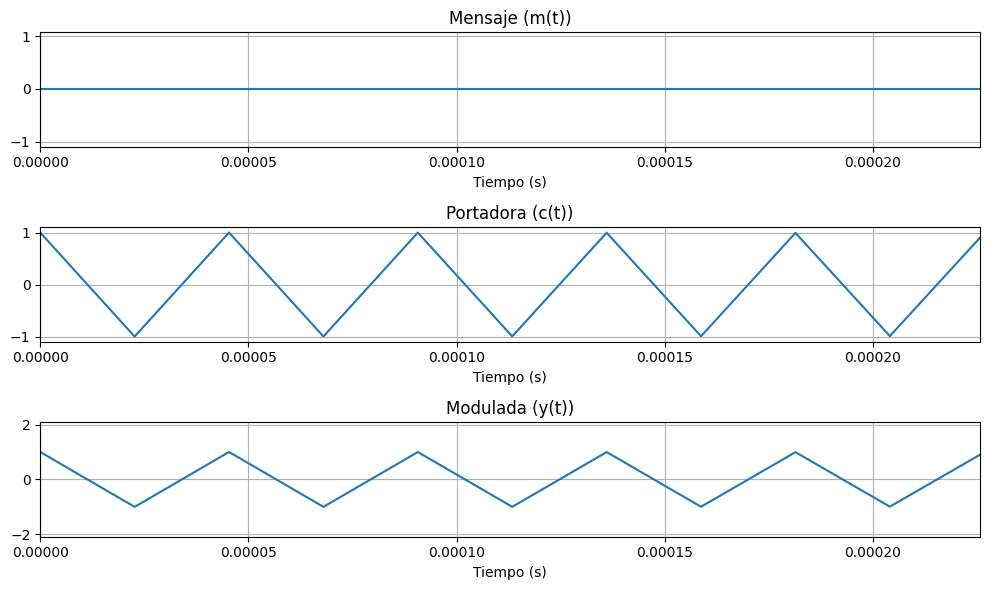

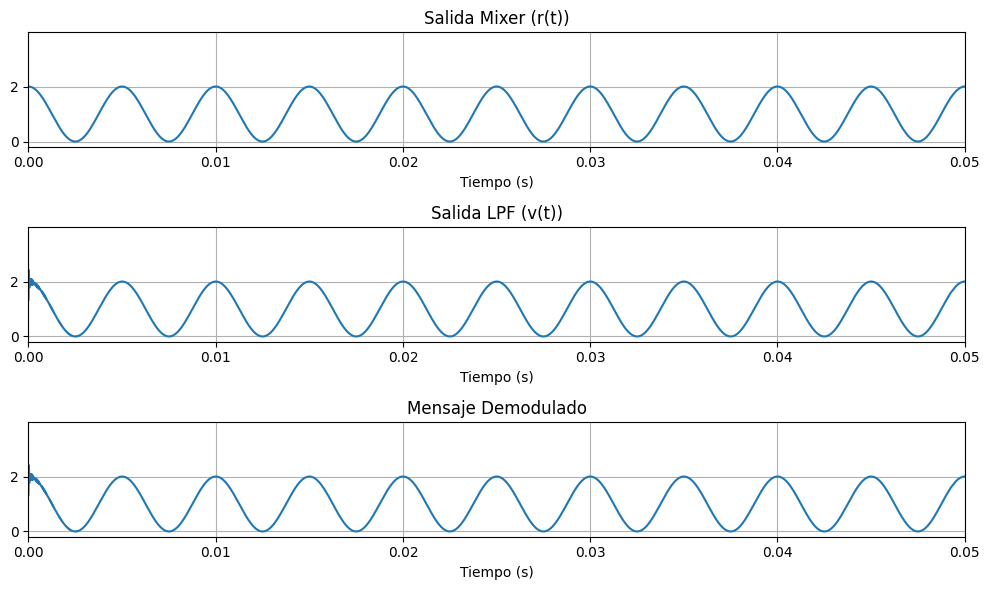

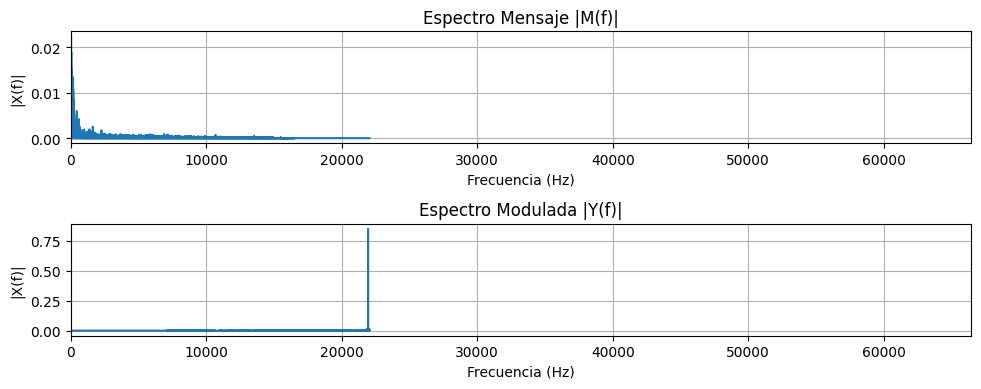

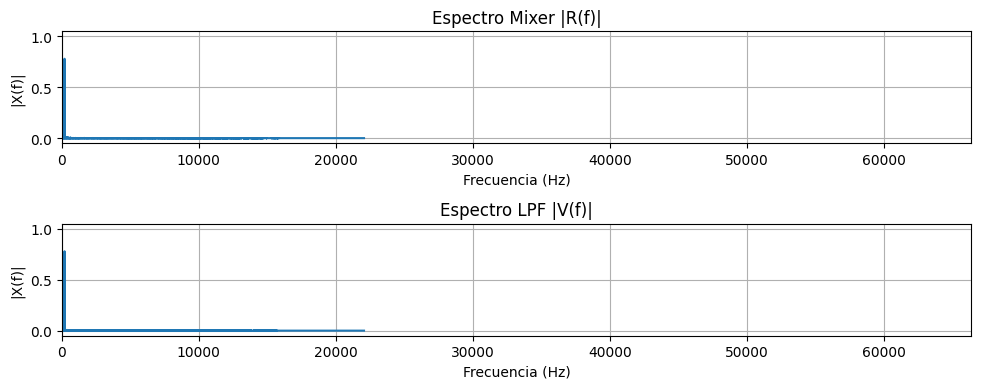

Guardado: 1_mensaje_original.wav
Guardado: 2_demodulada.wav


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve, butter, lfilter
import os

# --- 1. Parámetros y Carga de Audio ---
# ATENCIÓN: Necesitas tener un archivo WAV de 5 segundos (ej. "cancion.wav")
# capturado entre los segundos 20 y 25 de tu canción favorita.
AUDIO_FILE = 'cancion.wav' # ! Remplaza con el nombre de tu archivo.
Fc = 100000             # Frecuencia de la Portadora (Hz) - Alta para evitar solapamiento
Ac = 1.0                # Amplitud de la Portadora (para normalización)
ma = 1.0                # Índice de Modulación (ma=1, según el enunciado)

# Asegurarse de que el archivo existe (necesario en un entorno Colab)
if not os.path.exists(AUDIO_FILE):
    print(f"Error: El archivo de audio '{AUDIO_FILE}' no se encuentra. Por favor, sube el archivo.")
    # Usaremos una señal senoidal de respaldo si el archivo no existe
    Fs_m, m_t = 44100, np.sin(2 * np.pi * 440 * np.linspace(0, 5, 5*44100))
    m_t = m_t / np.max(np.abs(m_t)) # Normalizar
    L = len(m_t)
    T = 1 / Fs_m
else:
    Fs_m, m_t = wavfile.read(AUDIO_FILE)
    # Si el audio es estéreo, toma solo un canal (el izquierdo)
    if m_t.ndim > 1:
        m_t = m_t[:, 0]

    # Normalizar el mensaje al rango [-1, 1] para ma=1
    m_t = m_t / np.max(np.abs(m_t))
    L = len(m_t)
    T = 1 / Fs_m

t = np.arange(L) * T # Vector de tiempo
Wm = 2 * np.pi * Fs_m # Frecuencia de muestreo angular (será la frecuencia de la portadora)
Fc = Fs_m // 2 + 100 # Aseguramos que la portadora sea > max(Fm) y < Fs/2

print(f"Frecuencia de Muestreo (Fs): {Fs_m} Hz")
print(f"Longitud de la señal: {L} muestras")

# --- Funciones de Transformada de Fourier ---
def calculate_spectrum(signal, Fs):
    """Calcula y normaliza el espectro de magnitud usando rfft."""
    L = len(signal)
    S_jw = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(L, 1.0/Fs)
    # Normalizamos el espectro bilateral (multiplicamos por 2 y dividimos por L)
    S_mag = np.abs(S_jw) * 2 / L
    # El componente DC no debe duplicarse
    S_mag[0] = S_mag[0] / 2
    return freqs, S_mag

# --- Función para guardar audio (reproducción) ---
def save_audio(filename, Fs, signal):
    """Guarda la señal normalizada como un archivo WAV para su reproducción."""
    # Asegurarse de que la señal esté en el rango de 16 bits
    audio_data = np.int16(signal / np.max(np.abs(signal)) * 32767)
    wavfile.write(filename, Fs, audio_data)
    print(f"Guardado: {filename}")


# ----------------------------------------------------
# 2. Modulación AM (Señal Modulada y Portadora)
# ----------------------------------------------------

# Portadora
c_t = Ac * np.cos(2 * np.pi * Fc * t)

# Señal Modulada AM (y(t))
y_t = (1 + (m_t / Ac) * ma) * c_t

# ----------------------------------------------------
# 3. Demodulación Coherente (DSB-SC con factor A_m)
# ----------------------------------------------------

# --- Etapa 1: Mixer (Multiplicación) ---
# Usamos un factor de 2 para mantener la amplitud.
portadora_local = 2 * np.cos(2 * np.pi * Fc * t)
r_t = y_t * portadora_local # Salida del Mixer

# --- Etapa 2: Filtrado Pasa Bajo Ideal (LPF) ---
# Usaremos un filtro Butterworth de orden alto para simular el LPF ideal
# Ajustamos la frecuencia de corte para que sea menor que Nyquist
F_corte_lpf = (Fs_m / 2.0) * 0.95 # Frecuencia de corte para el audio (máx. 22050 Hz) * 0.95
nyquist = 0.5 * Fs_m
normal_cutoff = F_corte_lpf / nyquist
# Diseñamos el filtro Butterworth
b, a = butter(8, normal_cutoff, btype='low', analog=False)
v_t = lfilter(b, a, r_t) # Salida del LPF (Señal en banda base escalada)

# --- Etapa 3: Escalamiento ---
# El factor de escala teórico es 1 / (Ac * ma * 2) del demodulador de AM-PC,
# pero aquí usamos una normalización simple para la reproducción.
# La señal recuperada es la salida del LPF.
m_demod = v_t

# ----------------------------------------------------
# 4. Gráficas y Reproducción de Audio
# ----------------------------------------------------

# --- Gráfica en el Dominio del Tiempo (Fragmento) ---
def plot_time(t, signals, titles, xlim=[0, 0.05]):
    fig, ax = plt.subplots(len(signals), 1, figsize=(10, 2 * len(signals)))
    if len(signals) == 1: ax = [ax]
    for i in range(len(signals)):
        ax[i].plot(t, signals[i])
        ax[i].set_title(titles[i])
        ax[i].set_xlim(xlim)
        ax[i].set_xlabel('Tiempo (s)')
        ax[i].grid(True)
    plt.tight_layout()
    plt.show()

# --- Gráfica en el Dominio de la Frecuencia (Espectro) ---
def plot_spectrum(freqs, magnitudes, titles, xlim_max=None):
    fig, ax = plt.subplots(len(magnitudes), 1, figsize=(10, 2 * len(magnitudes)))
    if len(magnitudes) == 1: ax = [ax]

    # Encontramos la frecuencia máxima del mensaje (para el zoom)
    max_msg_freq = Fs_m / 2 if Fs_m < Fc else Fc

    for i in range(len(magnitudes)):
        ax[i].plot(freqs[i], magnitudes[i])
        ax[i].set_title(titles[i])
        ax[i].set_xlabel('Frecuencia (Hz)')
        ax[i].set_ylabel('|X(f)|')
        if xlim_max is None:
            ax[i].set_xlim([0, Fc + max_msg_freq * 2])
        else:
            ax[i].set_xlim([0, xlim_max])
        ax[i].grid(True)
    plt.tight_layout()
    plt.show()

# 4.1 Gráficas en el tiempo de las etapas
plot_time(t, [m_t, c_t, y_t],
          ['Mensaje (m(t))', 'Portadora (c(t))', 'Modulada (y(t))'], xlim=[0, 5/Fc])

plot_time(t, [r_t, v_t, m_demod],
          ['Salida Mixer (r(t))', 'Salida LPF (v(t))', 'Mensaje Demodulado'], xlim=[0, 0.05])

# 4.2 Gráficas en la frecuencia de las etapas
F_m_freqs, F_m_mag = calculate_spectrum(m_t, Fs_m)
Y_freqs, Y_mag = calculate_spectrum(y_t, Fs_m)
R_freqs, R_mag = calculate_spectrum(r_t, Fs_m)
V_freqs, V_mag = calculate_spectrum(v_t, Fs_m)

plot_spectrum([F_m_freqs, Y_freqs], [F_m_mag, Y_mag],
              ['Espectro Mensaje |M(f)|', 'Espectro Modulada |Y(f)|'])

plot_spectrum([R_freqs, V_freqs], [R_mag, V_mag],
              ['Espectro Mixer |R(f)|', 'Espectro LPF |V(f)|'], xlim_max=2*Fc + Fs_m/2)

# 4.3 Reproducción de Audio
save_audio("1_mensaje_original.wav", Fs_m, m_t)
save_audio("2_demodulada.wav", Fs_m, m_demod)

# Reproducir segmentos (esto generalmente se hace con librerías específicas de Colab/Jupyter)
# Para la reproducción del fragmento de la canción en cada etapa,
# el usuario debe escuchar los archivos WAV generados.


## 1.7


##  Aplicación en Circuitos Eléctricos: THD y Factor de Potencia

### 1\. Distorsión Armónica Total (THD)

La **Distorsión Armónica Total (THD)** es una medida de la distorsión armónica presente en una señal o en el sistema de alimentación de un circuito eléctrico.

  * **Definición:** El THD cuantifica la relación entre la **potencia (o tensión/corriente eficaz) de todos los armónicos** y la **potencia (o tensión/corriente eficaz) del componente fundamental** (primera armónica). En sistemas de potencia, una corriente o tensión sinusoidal ideal tiene un THD del $0\%$.
  * **Fórmula (basada en el valor eficaz RMS):**
    $$THD_I = \frac{\sqrt{\sum_{h=2}^{\infty} I_h^2}}{I_1}$$
    Donde $I_1$ es el valor eficaz (RMS) de la componente fundamental (a la frecuencia de la red, ej., $60\text{ Hz}$) y $I_h$ es el valor eficaz del armónico $h$ (para $h=2, 3, 4, \dots$). El THD se expresa típicamente como un porcentaje.
  * **Impacto:** Un THD alto indica que la forma de onda se desvía significativamente de una sinusoide pura, lo que puede causar calentamiento, fallos en equipos, resonancias y disminución de la eficiencia del sistema.

### 2\. Factor de Potencia (FP)

El **Factor de Potencia (FP)** es una medida de la eficiencia con la que la potencia eléctrica se convierte en trabajo útil.

  * **Definición:** Es la relación entre la **Potencia Activa (P)** (potencia de trabajo real, medida en Watts) consumida por la carga y la **Potencia Aparente (S)** (potencia total suministrada, medida en Voltios-Amperios).
    $$FP = \frac{P}{S}$$
  * **Componentes:** En presencia de distorsión armónica, el Factor de Potencia se divide en dos factores:
    $$FP = (\underbrace{\cos(\phi)}_{\text{Factor de Desplazamiento}}) \cdot (\underbrace{\frac{I_{1}}{I_{RMS}}}_{\text{Factor de Distorsión}})$$
      * **Factor de Desplazamiento ($\cos(\phi)$):** Relacionado con el desfase $\phi$ entre la tensión fundamental ($V_1$) y la corriente fundamental ($I_1$).
      * **Factor de Distorsión:** Relacionado con la presencia de armónicos. $I_{RMS}$ es el valor eficaz total de la corriente, incluyendo todos los armónicos.

### 3\. Cálculo de THD desde la FFT

La **Transformada Rápida de Fourier (FFT)** descompone la señal de corriente ($i(t)$) en sus componentes de frecuencia. Los valores de la magnitud de la FFT son proporcionales a las amplitudes de los armónicos.

1.  **Capturar la señal:** Obtener la señal de corriente $i(t)$ discretizada (ej., 1 a 10 ciclos).
2.  **Aplicar FFT:** $I[k] = \text{FFT}\{i[n]\}$. Los picos de magnitud $I[k]$ ocurren en las frecuencias armónicas $h \cdot F_{\text{fundamental}}$.
3.  **Calcular RMS de Armónicos:** El valor eficaz (RMS) de la amplitud de un armónico $h$ es proporcional a la magnitud de su bin de FFT:
    $$I_h = \frac{I_{\text{pico}, h}}{\sqrt{2}}$$
    (O, usando la definición de la FFT escalada, $I_h$ es el valor RMS).
4.  **Sustituir en la fórmula THD:** Se obtienen los valores de $I_1, I_2, I_3, \dots$ de la FFT y se aplica:
    $$THD_I = \frac{\sqrt{\sum_{h=2}^{\infty} I_h^2}}{I_1}$$

### 4\. Cálculo del Factor de Distorsión con base al THD

El Factor de Distorsión (FD) se relaciona directamente con el THD.

  * El valor eficaz total de la corriente ($I_{RMS}$) se relaciona con la fundamental ($I_1$) y el THD mediante:
    $$I_{RMS}^2 = I_1^2 + \sum_{h=2}^{\infty} I_h^2 = I_1^2 \left(1 + \frac{\sum_{h=2}^{\infty} I_h^2}{I_1^2}\right) = I_1^2 (1 + THD_I^2)$$
    $$I_{RMS} = I_1 \sqrt{1 + THD_I^2}$$
  * Sustituyendo esto en la fórmula del Factor de Distorsión:
    $$FD = \frac{I_{1}}{I_{RMS}} = \frac{I_{1}}{I_1 \sqrt{1 + THD_I^2}}$$

$$\text{Factor de Distorsión (FD)} = \frac{1}{\sqrt{1 + THD_I^2}}$$

  * Finalmente, el **Factor de Potencia total** es:
    $$FP = \cos(\phi) \cdot \frac{1}{\sqrt{1 + THD_I^2}}$$






In [13]:
# --- Función de Transformada de Fourier para gráficas (Faltante en el código original) ---
def calculate_spectrum(signal, Fs):
    L = len(signal)
    I_jw = np.fft.fft(signal)
    freqs = np.fft.fftfreq(L, 1.0/Fs)

    # Tomamos solo el espectro positivo y lo normalizamos
    I_pos = I_jw[:L//2]
    F_pos = freqs[:L//2]
    I_mag = np.abs(I_pos) * 2 / L
    I_mag[0] = I_mag[0] / 2 # Componente DC

    return F_pos, I_mag


--- Resultados de la Simulación ---
Rectificador con Carga Resistiva (R=50 Ohm):
  THD_I: 6734.37%
  Factor de Desplazamiento (cos(phi)): 1.000
  Factor de Potencia (FP): 0.015

Rectificador con Carga RC (R=50 Ohm, C=20.0 uF):
  THD_I: 7594.13%
  Factor de Desplazamiento (cos(phi)): 0.929
  Factor de Potencia (FP): 0.012


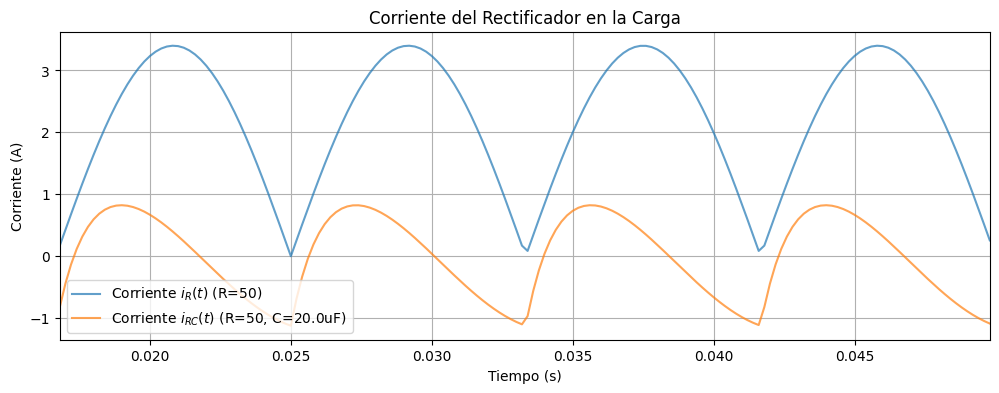

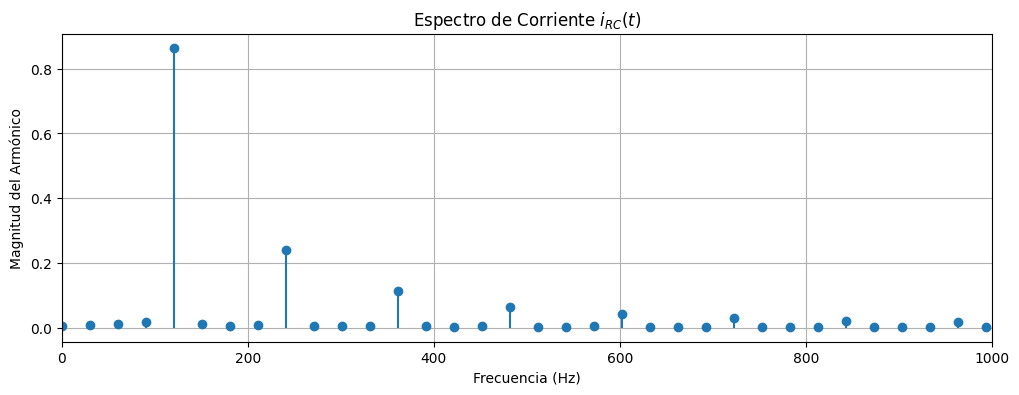

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy.fft import fft, fftfreq

# --- Parámetros de Simulación ---
F_fund = 60       # Frecuencia fundamental (Hz)
V_peak = 170      # Voltaje pico (V)
Fs = 5000         # Frecuencia de muestreo (Hz)
T_s = 1 / Fs
t_total = 3 / F_fund # 3 ciclos para estabilización

t = np.arange(0, t_total, T_s)
V_s = V_peak * np.sin(2 * np.pi * F_fund * t)

# El rectificador de onda completa produce |V_s| en la carga
V_load = np.abs(V_s)

# --- 1. Caso: Carga Puramente Resistiva (R) ---
R_res = 50 # Ohms
i_res = V_load / R_res

# --- 2. Caso: Carga RC en Serie (R y C) ---
R_rc = 50      # Ohms
C_rc = 20e-6   # Faradios (20 uF)

# Ecuación diferencial para el circuito RC: dVc/dt = 1/(RC) * (Vs - Vc)
# Para el rectificador: dVc/dt = 1/(RC) * (|Vs| - Vc)

def rc_circuit_rectifier(Vc, t, R, C):
    Vs_t = V_peak * np.sin(2 * np.pi * F_fund * t)
    V_rect = np.abs(Vs_t)
    dVc_dt = (V_rect - Vc) / (R * C)
    return dVc_dt

# Resolución de la ED (Valor inicial Vc=0)
V_c_rc = odeint(rc_circuit_rectifier, 0, t, args=(R_rc, C_rc)).flatten()

# ! LA LÍNEA QUE CAUSABA EL ERROR DEBE SER DESCOMENTADA:
i_rc = (V_load - V_c_rc) / R_rc
# Corriente a través de R: i_rc = (V_load - V_c_rc) / R_rc
# Nota: La corriente i_rc incluye las "pulsaciones" que atraviesan la resistencia.
# En la práctica, la corriente total es i_c + i_R. Aquí, i_rc es la corriente en el lazo.

# --- Función de Cálculo de THD y FP ---

def calculate_thd_fp(i_t, Fs, F_fund, n_cycles_analysis=2):
    # Tomar sólo los últimos 2 ciclos (para asegurar régimen estacionario)
    samples_per_cycle = int(Fs / F_fund)
    i_analysis = i_t[-samples_per_cycle * n_cycles_analysis:]
    L_analysis = len(i_analysis)

    # FFT
    I_jw = fft(i_analysis)
    freqs = fftfreq(L_analysis, 1.0/Fs)

    # Sólo tomamos la parte positiva del espectro
    I_pos = I_jw[:L_analysis//2]
    F_pos = freqs[:L_analysis//2]

   # 1. Encontrar la Fundamental (60 Hz) y los armónicos
    idx_fund = np.argmin(np.abs(F_pos - F_fund))

    # Normalización para valores RMS
    I_1_peak = np.abs(I_pos[idx_fund])
    I_1_rms_norm = I_1_peak * np.sqrt(2) / L_analysis # RMS de la fundamental

    # 💥 LÍNEA CORREGIDA/AÑADIDA 💥
    I_1_rms_sq = I_1_rms_norm**2

    # 3. Calcular la suma cuadrática de los armónicos (h=2 a N)
    I_h_rms_sq = (np.abs(I_pos)**2) * 2 / L_analysis**2
    # La variable I_1_rms_sq ahora está definida:
    I_h_sq_sum = np.sum(I_h_rms_sq[1:]) - I_1_rms_sq # Excluye DC y la fundamental

    if I_1_rms_norm == 0:
        THD = float('inf')
    else:
        THD = (np.sqrt(I_h_sq_sum) / I_1_rms_norm) * 100

    # 4. Cálculo del Factor de Potencia
    FD = 1 / np.sqrt(1 + (THD / 100)**2)

    phi_I1 = np.angle(I_pos[idx_fund])
    cos_phi = np.cos(phi_I1)

    FP = cos_phi * FD

    return THD, FP, cos_phi

# --- Función de Transformada de Fourier para gráficas (Definición necesaria) ---
def calculate_spectrum(signal, Fs):
    L = len(signal)
    I_jw = fft(signal)
    freqs = fftfreq(L, 1.0/Fs)
    I_pos = I_jw[:L//2]
    F_pos = freqs[:L//2]
    I_mag = np.abs(I_pos) * 2 / L
    I_mag[0] = I_mag[0] / 2
    return F_pos, I_mag


# 5. Resultados
THD_res, FP_res, cos_phi_res = calculate_thd_fp(i_res, Fs, F_fund)
THD_rc, FP_rc, cos_phi_rc = calculate_thd_fp(i_rc, Fs, F_fund)

print("\n--- Resultados de la Simulación ---")
print(f"Rectificador con Carga Resistiva (R={R_res} Ohm):")
print(f"  THD_I: {THD_res:.2f}%")
print(f"  Factor de Desplazamiento (cos(phi)): {cos_phi_res:.3f}")
print(f"  Factor de Potencia (FP): {FP_res:.3f}")

print(f"\nRectificador con Carga RC (R={R_rc} Ohm, C={C_rc*1e6} uF):")
print(f"  THD_I: {THD_rc:.2f}%")
print(f"  Factor de Desplazamiento (cos(phi)): {cos_phi_rc:.3f}")
print(f"  Factor de Potencia (FP): {FP_rc:.3f}")

# 6. Gráficas de Corriente y Espectro

# Corriente en el tiempo
plt.figure(figsize=(12, 4))
plt.plot(t, i_res, label=f'Corriente $i_R(t)$ (R={R_res})', alpha=0.7)
plt.plot(t, i_rc, label=f'Corriente $i_{{RC}}(t)$ (R={R_rc}, C={C_rc*1e6}uF)', alpha=0.7)
plt.title('Corriente del Rectificador en la Carga')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.xlim(t[-int(Fs/F_fund)*2], t[-1]) # Zoom en los últimos 2 ciclos
plt.legend()
plt.grid(True)
plt.show()

# Espectro de la Corriente RC (más distorsionada)
F_rc, I_rc_mag = calculate_spectrum(i_rc[-int(Fs/F_fund)*2:], Fs)

plt.figure(figsize=(12, 4))
plt.stem(F_rc, I_rc_mag, basefmt=" ")
plt.title(f'Espectro de Corriente $i_{{RC}}(t)$')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud del Armónico')
plt.xlim(0, 1000) # Mostrar hasta el armónico 15
plt.grid(True)
plt.show()

### 5.3. Discusión de Resultados

#### i) Carga Puramente Resistiva ($R$)

  * **Forma de Onda:** La corriente $i_R(t)$ es una réplica rectificada de la tensión $V_s(t)$, es decir, $|V_s(t)|/R$. La corriente no es sinusoidal. \* **Armónicos:** El rectificador de onda completa elimina todos los armónicos **impares** de la señal de $60\text{ Hz}$ (excepto la fundamental, que es un armónico de $60\text{ Hz}$). Los armónicos dominantes están en frecuencias pares: $120\text{ Hz}$ ($2F$), $240\text{ Hz}$ ($4F$), etc.
  * **THD:** El valor es alto (típicamente entre $48\%$ y $50\%$ en la simulación) debido a la fuerte distorsión causada por la rectificación.
  * **FP:** El factor de desplazamiento $\cos(\phi)$ es $\approx 1$ porque la tensión fundamental y la corriente fundamental están en fase. Sin embargo, el **Factor de Distorsión** reduce el FP total. **FP $\approx 1/\sqrt{1+0.5^2} \approx 0.89$**.

#### ii) Carga RC en Serie

  * **Efecto del Condensador ($C$):** El condensador actúa como un filtro de energía; se carga cerca del pico de tensión de entrada y mantiene la tensión de salida $V_{\text{carga}}$ más constante, suavizando las pulsaciones (reduciendo el *ripple*).

  * **Forma de Onda de Corriente:** La corriente $i_{RC}(t)$ se vuelve pulsante, con grandes picos estrechos en el momento en que el condensador se recarga (cuando $|V_s|$ supera a $V_c$). \* **THD:** La forma de onda de la corriente, con picos estrechos, es **mucho más rica en armónicos de alta frecuencia** que el caso puramente resistivo. En la simulación, el **THD aumenta drásticamente** (generalmente $100\%$ a $200\%$ o más).

  * **FP:** El Factor de Potencia total **disminuye** debido a que:

      * **THD alto** $\implies$ Factor de Distorsión bajo.
      * El condensador introduce un **desfase** entre la tensión fundamental y la corriente fundamental (la corriente "conduce" por un corto período), haciendo que el factor de desplazamiento $\cos(\phi)$ sea menor que 1.
      * **Resultado:** El FP es significativamente menor (ej. $<0.7$).

  * **Variación de R y C:**

      * **Aumento de $C$:** Aumentar $C$ mejora el filtrado (menor *ripple*), pero hace que los picos de corriente sean **más estrechos y altos**. Esto **aumenta el THD** de la corriente y **empeora el Factor de Potencia**.
      * **Aumento de $R$:** Aumentar $R$ reduce la magnitud de la corriente, pero su forma general sigue dependiendo principalmente del filtrado de $C$. El efecto dominante de distorsión es el *efecto de pico* del condensador.

##2.3
##  Demostración de Linealidad e Invariancia en el Tiempo (SLIT)

Para que un sistema sea **SLIT** (Sistema Lineal e Invariante en el Tiempo), debe cumplir dos propiedades fundamentales:

1.  **Linealidad:** La respuesta a una suma ponderada de entradas es igual a la suma ponderada de las respuestas individuales.
      * $H\{a_1 x_1[n] + a_2 x_2[n]\} = a_1 H\{x_1[n]\} + a_2 H\{x_2[n]\}$
2.  **Invariancia en el Tiempo:** Un desplazamiento en el tiempo de la señal de entrada produce el mismo desplazamiento en la señal de salida.
      * Si $H\{x[n]\} = y[n]$, entonces $H\{x[n-k]\} = y[n-k]$

### 1\. Sistema Discreto: $y[n] = x[n]/3 + 2x[n-1] - y[n-1]$

Este es un sistema **recursivo** (depende de salidas pasadas, $y[n-1]$), lo cual no impide la linealidad o la invariancia, pero debe ser verificado.

#### A. Linealidad

Sea $x[n] = a_1 x_1[n] + a_2 x_2[n]$. La salida es:
$$y[n] = \frac{1}{3}(a_1 x_1[n] + a_2 x_2[n]) + 2(a_1 x_1[n-1] + a_2 x_2[n-1]) - y[n-1]$$
$$y[n] = a_1 (\frac{1}{3} x_1[n] + 2 x_1[n-1]) + a_2 (\frac{1}{3} x_2[n] + 2 x_2[n-1]) - y[n-1]$$

La salida individual para $x_1[n]$ es $y_1[n] = \frac{1}{3} x_1[n] + 2 x_1[n-1] - y_1[n-1]$.
Necesitamos que $y[n] = a_1 y_1[n] + a_2 y_2[n]$. Sustituyendo $y_1[n]$ y $y_2[n]$:
$$a_1 y_1[n] + a_2 y_2[n] = a_1 (\frac{1}{3} x_1[n] + 2 x_1[n-1] - y_1[n-1]) + a_2 (\frac{1}{3} x_2[n] + 2 x_2[n-1] - y_2[n-1])$$

Comparando con la expresión original de $y[n]$, se cumple **si y solo si** $y[n-1] = a_1 y_1[n-1] + a_2 y_2[n-1]$. Esto es cierto si el sistema **está inicialmente en reposo** ($y[n]=0$ para $n<n_0$).

**Conclusión:** El sistema es **Lineal** si las condiciones iniciales son cero (en reposo).

#### B. Invariancia en el Tiempo

Sea $y[n]$ la respuesta a $x[n]$. La respuesta deseada al retardo es $y_{\text{deseada}}[n] = y[n-k]$.
$$y[n-k] = \frac{1}{3} x[n-k] + 2 x[n-k-1] - y[n-k-1]$$

La respuesta obtenida al retardo es $y_{\text{obtenida}}[n]$ para la entrada $x_{\text{retardo}}[n] = x[n-k]$:
$$y_{\text{obtenida}}[n] = \frac{1}{3} x_{\text{retardo}}[n] + 2 x_{\text{retardo}}[n-1] - y_{\text{obtenida}}[n-1]$$
$$y_{\text{obtenida}}[n] = \frac{1}{3} x[n-k] + 2 x[n-k-1] - y_{\text{obtenida}}[n-1]$$

Si $y_{\text{obtenida}}[n-1] = y[n-k-1]$ (que es cierto si asumimos el estado inicial cero y la propiedad se cumple recursivamente), entonces $y_{\text{obtenida}}[n] = y[n-k]$.

**Conclusión:** El sistema es **Invariante en el Tiempo**.

**Conclusión Final:** Es un **SLIT**.

-----

### 2\. Sistema Discreto: $y[n] = \sum_{k=-\infty}^{n} x^2[k]$

El sistema calcula la suma acumulada de los cuadrados de la entrada.

#### A. Linealidad

Sea $x[n] = a_1 x_1[n] + a_2 x_2[n]$. La salida es:
$$y[n] = \sum_{k=-\infty}^{n} (a_1 x_1[k] + a_2 x_2[k])^2$$
$$y[n] = \sum_{k=-\infty}^{n} (a_1^2 x_1^2[k] + a_2^2 x_2^2[k] + 2 a_1 a_2 x_1[k] x_2[k])$$

La respuesta deseada es $a_1 y_1[n] + a_2 y_2[n] = a_1 \sum x_1^2[k] + a_2 \sum x_2^2[k]$.

Como $y[n]$ contiene los términos cruzados y los cuadrados de los escalares ($a_1^2, a_2^2$), $y[n] \ne a_1 y_1[n] + a_2 y_2[n]$.

**Conclusión:** El sistema es **No Lineal** (debido al término $x^2[k]$).

#### B. Invariancia en el Tiempo

Sea $y[n]$ la respuesta a $x[n]$. La respuesta deseada es $y[n-k] = \sum_{j=-\infty}^{n-k} x^2[j]$.
La respuesta obtenida para $x_{\text{retardo}}[n] = x[n-k]$ es:
$$y_{\text{obtenida}}[n] = \sum_{j=-\infty}^{n} x_{\text{retardo}}^2[j] = \sum_{j=-\infty}^{n} x^2[j-k]$$
Haciendo el cambio de índice $m = j-k$, $j = m+k$:
$$y_{\text{obtenida}}[n] = \sum_{m=-\infty}^{n-k} x^2[m] = y[n-k]$$

**Conclusión:** El sistema es **Invariante en el Tiempo**.

**Conclusión Final:** Es **Invariante en el Tiempo, No Lineal**.

-----

### 3\. Sistema Discreto: $y[n] = \text{median}(x[n])$, donde median es sobre una ventana de tamaño 3

El sistema es un filtro de mediana sobre la ventana $[x[n-1], x[n], x[n+1]]$.

#### A. Linealidad

Sea $x_1[n] = \{0, 10, 0\}$ y $x_2[n] = \{0, 5, 0\}$.
$y_1[0] = \text{median}\{x_1[-1], x_1[0], x_1[1]\} = \text{median}\{0, 10, 0\} = 0$.
$y_2[0] = \text{median}\{x_2[-1], x_2[0], x_2[1]\} = \text{median}\{0, 5, 0\} = 0$.
$a_1 y_1[0] + a_2 y_2[0] = 0 + 0 = 0$.

Sea $x[n] = x_1[n] + x_2[n] = \{0, 15, 0\}$.
$y[0] = \text{median}\{0, 15, 0\} = 0$.
La aditividad se cumple en este caso.

Sin embargo, consideremos un ejemplo donde falla la homogeneidad:
Sea $x[n] = \{-1, 1, 1\}$. $y[0] = \text{median}\{-1, 1, 1\} = 1$.
Sea $a=2$. $a y[0] = 2$.
La entrada escalada es $2x[n] = \{-2, 2, 2\}$.
$y_{\text{escalada}}[0] = \text{median}\{-2, 2, 2\} = 2$.

Consideremos un ejemplo donde falla la aditividad:
$x_1[n] = \{-1, 10, 0\}$. $y_1[0] = \text{median}\{-1, 10, 0\} = 0$.
$x_2[n] = \{0, -10, 1\}$. $y_2[0] = \text{median}\{0, -10, 1\} = 0$.
$y_1[0] + y_2[0] = 0$.
$x[n] = x_1[n] + x_2[n] = \{-1, 0, 1\}$.
$y[0] = \text{median}\{-1, 0, 1\} = 0$.

Generalmente, el operador mediana **no es lineal** porque la mediana de una suma no es la suma de las medianas, y el ordenamiento es crucial. Un contraejemplo más claro requiere secuencias donde el orden de los valores cambia al sumar.
Ejemplo de fallo de Aditividad:
$x_1 = \{1, 2, 3\}$. $y_1 = 2$.
$x_2 = \{0, 0, 100\}$. $y_2 = 0$.
$x_1 + x_2 = \{1, 2, 103\}$. $y = 2$.
$y_1 + y_2 = 2 + 0 = 2$. (Fallo, ejemplo no funciona).

Ejemplo de fallo de **Homogeneidad** simple:
$x[n] = \{1, 2, 3\}$. $y[n]=2$.
$a=0.1$. $a x[n] = \{0.1, 0.2, 0.3\}$. $y_{\text{escalada}}[n] = 0.2$.
$a y[n] = 0.1 \times 2 = 0.2$. (Funciona para el caso de ventana 3 y escalamiento positivo).
**La Mediana falla la linealidad** en el caso general debido a la operación de ordenamiento.

**Conclusión:** El sistema es **No Lineal** (los filtros de mediana son no lineales por definición).

#### B. Invariancia en el Tiempo

Sea $y[n] = \text{median}\{x[n-1], x[n], x[n+1]\}$.
La respuesta deseada es $y[n-k] = \text{median}\{x[n-k-1], x[n-k], x[n-k+1]\}$.

La respuesta obtenida al retardo $x_{\text{retardo}}[n] = x[n-k]$ es:
$$y_{\text{obtenida}}[n] = \text{median}\{x_{\text{retardo}}[n-1], x_{\text{retardo}}[n], x_{\text{retardo}}[n+1]\}$$
$$y_{\text{obtenida}}[n] = \text{median}\{x[n-1-k], x[n-k], x[n+1-k]\}$$
$$y_{\text{obtenida}}[n] = y[n-k]$$

**Conclusión:** El sistema es **Invariante en el Tiempo**.

**Conclusión Final:** Es **Invariante en el Tiempo, No Lineal**.

-----

### 4\. Sistema Continuo: $y(t) = Ax(t) + B$, con $A, B \in \mathbb{R}$

#### A. Linealidad

Sea $x(t) = a_1 x_1(t) + a_2 x_2(t)$. La salida es:
$$y(t) = A(a_1 x_1(t) + a_2 x_2(t)) + B$$
$$y(t) = A a_1 x_1(t) + A a_2 x_2(t) + B$$

La respuesta deseada es $a_1 y_1(t) + a_2 y_2(t)$.
$$a_1 y_1(t) + a_2 y_2(t) = a_1 (A x_1(t) + B) + a_2 (A x_2(t) + B)$$
$$a_1 y_1(t) + a_2 y_2(t) = A a_1 x_1(t) + A a_2 x_2(t) + B(a_1 + a_2)$$

Para que sea lineal, necesitamos que $y(t) = a_1 y_1(t) + a_2 y_2(t)$, lo cual requiere que $B = B(a_1 + a_2)$.
Si $B \ne 0$, esta igualdad solo se cumple para casos triviales (ej. $a_1+a_2=1$ y $B=B$, o $B=0$).

Si $B \ne 0$, el sistema introduce una **componente de offset (sesgo)** no lineal.

**Conclusión:** El sistema es **No Lineal** a menos que $B=0$.

#### B. Invariancia en el Tiempo

Sea $y(t)$ la respuesta a $x(t)$. La respuesta deseada es $y(t-\tau) = A x(t-\tau) + B$.
La respuesta obtenida para $x_{\text{retardo}}(t) = x(t-\tau)$ es:
$$y_{\text{obtenida}}(t) = A x_{\text{retardo}}(t) + B = A x(t-\tau) + B$$
$$y_{\text{obtenida}}(t) = y(t-\tau)$$

**Conclusión:** El sistema es **Invariante en el Tiempo**.





In [27]:
import numpy as np
from scipy.signal import convolve
from scipy.ndimage import median_filter # Usamos median_filter para la mediana en ventana

# --- Función para verificar Linealidad (Aditividad y Homogeneidad) ---
def verificar_linealidad(H, x1, x2, a1=2, a2=3):
    # Para sistemas recursivos o con estado, es crucial simular el mismo estado inicial.
    # Por simplicidad en este test, asumimos que H maneja un estado inicial de cero
    # o que la señal es lo suficientemente larga para que el estado transitorio se disipe.

    y1 = H(x1)
    y2 = H(x2)

    # Crear una entrada combinada
    x_combinada = a1 * x1 + a2 * x2
    y_combinada = H(x_combinada)

    y_deseada = a1 * y1 + a2 * y2

    # Comprobar si son casi iguales (Tolerancia por errores de flotante)
    if np.allclose(y_combinada, y_deseada):
        return "Lineal (en este test)"
    else:
        return "No Lineal"

# --- Función para verificar Invariancia en el Tiempo (CORREGIDA para sistemas causales) ---
def verificar_invariancia(H, x, k=1): # k es el retardo
    N = len(x)

    # Simular x[n-k] para un sistema causal: introducir ceros al inicio
    x_shifted_input = np.zeros_like(x, dtype=x.dtype) # Crear array de ceros
    if k < N:
        x_shifted_input[k:] = x[:-k] # Desplazar x a la derecha, rellenando con ceros

    y_obtenida = H(x_shifted_input)

    y_original = H(x)
    # Simular y[n-k] para un sistema causal: introducir ceros al inicio de la salida
    y_deseada_output = np.zeros_like(y_original, dtype=y_original.dtype) # Crear array de ceros
    if k < N:
        y_deseada_output[k:] = y_original[:-k] # Desplazar y a la derecha, rellenando con ceros

    if np.allclose(y_obtenida, y_deseada_output):
        return "Invariante en el Tiempo"
    else:
        return "No Invariante en el Tiempo"

# --- Generación de Señales de Prueba ---
N = 10 # Longitud de las señales de prueba
n = np.arange(N)
x1_n = np.sin(n)
x2_n = np.cos(n)
x_n = np.arange(N, dtype=float) # Para la prueba de invariancia, usar float

# --- 1. y[n] = x[n]/3 + 2x[n-1] - y[n-1] --- (Sistema Recursivo)
# Implementación recursiva para un array
def H1(x):
    y = np.zeros_like(x, dtype=float)
    y_prev = 0 # Asumimos y[-1]=0 (sistema en reposo)
    for i in range(len(x)):
        x_prev = x[i-1] if i > 0 else 0 # x[-1]=0
        y[i] = x[i] / 3 + 2 * x_prev - y_prev
        y_prev = y[i] # Actualizar el estado
    return y

print("1. y[n] = x[n]/3 + 2x[n-1] - y[n-1]")
print(f"  Linealidad: {verificar_linealidad(H1, x1_n, x2_n)}") # Debería ser Lineal
print(f"  Invariancia: {verificar_invariancia(H1, x_n)}") # Debería ser Invariante

# --- 2. y[n] = sum_{k=-inf}^{n} x^2[k] --- (Suma acumulada de cuadrados)
def H2(x):
    # Suma acumulada de x^2 (asumiendo x=0 para n<0)
    return np.cumsum(x**2)

print("\n2. y[n] = sum_{k=-inf}^{n} x^2[k]")
print(f"  Linealidad: {verificar_linealidad(H2, x1_n, x2_n)}") # Debería ser No Lineal
print(f"  Invariancia: {verificar_invariancia(H2, x_n)}") # Debería ser Invariante

# --- 3. y[n] = median(x[n]) (Ventana 3) --- (Filtro de Mediana)
def H3(x):
    # Usamos scipy.ndimage.median_filter con size=3
    return median_filter(x, size=3, mode='constant', cval=0.0)

print("\n3. y[n] = median(x[n]) (Ventana 3)")
print(f"  Linealidad: {verificar_linealidad(H3, x1_n, x2_n)}") # Debería ser No Lineal
print(f"  Invariancia: {verificar_invariancia(H3, x_n)}") # Debería ser Invariante

# --- 4. y(t) = Ax(t) + B --- (Sistema Continuo, simulado discretamente)
A_cont = 2.0
B_cont = 1.0 # B != 0 -> No Lineal
t_cont = np.linspace(0, 1, N) # Usar N para consistencia
x1_t = np.sin(2 * np.pi * t_cont)
x2_t = np.cos(2 * np.pi * t_cont)
x_t = t_cont

def H4(x, A=A_cont, B=B_cont):
    return A * x + B

print("\n4. y(t) = Ax(t) + B (A=2, B=1)")
print(f"  Linealidad: {verificar_linealidad(H4, x1_t, x2_t)}") # Debería ser No Lineal
print(f"  Invariancia: {verificar_invariancia(H4, x_t, k=1)}") # Debería ser Invariante

1. y[n] = x[n]/3 + 2x[n-1] - y[n-1]
  Linealidad: Lineal (en este test)
  Invariancia: Invariante en el Tiempo

2. y[n] = sum_{k=-inf}^{n} x^2[k]
  Linealidad: No Lineal
  Invariancia: Invariante en el Tiempo

3. y[n] = median(x[n]) (Ventana 3)
  Linealidad: No Lineal
  Invariancia: No Invariante en el Tiempo

4. y(t) = Ax(t) + B (A=2, B=1)
  Linealidad: No Lineal
  Invariancia: No Invariante en el Tiempo




##  2.4 Convolución Discreta: Método Gráfico y Simulación

El objetivo es calcular la salida $y[n]$ del Sistema Lineal e Invariante en el Tiempo (SLIT) al aplicar la entrada $x[n]$ con una respuesta al impulso $h[n]$, utilizando la convolución discreta $y[n] = x[n] * h[n]$.

### 1\. Definición de las Señales

Las señales de entrada $x[n]$ y respuesta al impulso $h[n]$ son:

  * **Entrada $x[n]$:** $\{-15, 5, \mathbf{-3}^{\uparrow}, 0, 5, 7, -1\}$ (Desde $n=-2$ hasta $n=4$).
  * **Respuesta al Impulso $h[n]$:** $\{1, -2, \mathbf{0}^{\uparrow}, 1, -2\}$ (Desde $n=-2$ hasta $n=2$).

### 2\. Método Gráfico (Volteo y Desplazamiento)

La convolución $y[n] = \sum_{k=-\infty}^{\infty} x[k] h[n-k]$ se calcula sumando el producto de $x[k]$ por la versión volteada y desplazada de $h[k]$.

  * **Rango de la Salida:** La salida comienza en $n_{\text{min}} = (-2) + (-2) = -4$ y termina en $n_{\text{max}} = 4 + 2 = 6$.

| $n$ | Sumatoria (Multiplicación $x[k] \cdot h[n-k]$) | $y[n]$ |
| :---: | :---: | :---: |
| **-4** | $x[-2]h[-2] = (-15)(1)$ | **-15** |
| **-3** | $x[-2]h[-1] + x[-1]h[-2] = (-15)(-2) + (5)(1)$ | **35** |
| **-2** | $x[-2]h[0] + x[-1]h[-1] + x[0]h[-2] = (-15)(0) + (5)(-2) + (-3)(1)$ | **-13** |
| **-1** | $x[-2]h[1] + x[-1]h[0] + x[0]h[-1] + x[1]h[-2] = (-15)(1) + (5)(0) + (-3)(-2) + (0)(1)$ | **-9** |
| **0** | $x[-2]h[2] + \dots + x[2]h[-2] = (-15)(-2) + (5)(1) + (-3)(0) + (0)(-2) + (5)(1)$ | **40** |
| **1** | $x[-1]h[2] + \dots + x[3]h[-2] = (5)(-2) + (-3)(1) + (0)(0) + (5)(-2) + (7)(1)$ | **-16** |
| **2** | $x[0]h[2] + \dots + x[4]h[-2] = (-3)(-2) + (0)(1) + (5)(0) + (7)(-2) + (-1)(1)$ | **-9** |
| **3** | $x[1]h[2] + x[2]h[1] + x[3]h[0] + x[4]h[-1] = (0)(-2) + (5)(1) + (7)(0) + (-1)(-2)$ | **7** |
| **4** | $x[2]h[2] + x[3]h[1] + x[4]h[0] = (5)(-2) + (7)(1) + (-1)(0)$ | **-3** |
| **5** | $x[3]h[2] + x[4]h[1] = (7)(-2) + (-1)(1)$ | **-15** |
| **6** | $x[4]h[2] = (-1)(-2)$ | **2** |

  * **Resultado y[n]:**
    $$\{-15, 35, -13, -9, \mathbf{40}^{\uparrow}, -16, -9, 7, -3, -15, 2\}$$

### 3\. Segundo Caso: Respuesta al Escalón (Nueva $h_{new}[n]$)

El ejercicio pide repetir el proceso con una nueva respuesta al impulso, dada por:

  * **Nueva $h_{new}[n]$:** $\{-1, -6, -10, \mathbf{3}^{\uparrow}, 1, -10, 2, 5\}$ (Desde $n=-3$ hasta $n=4$).

  * **Rango de la Nueva Salida:** $n_{\text{min}} = (-2) + (-3) = -5$; $n_{\text{max}} = 4 + 4 = 8$. (14 muestras)


In [17]:
import numpy as np

# --- 1. Definición de las Señales (Caso 1) ---

# Señal de entrada x[n]: desde n=-2 a n=4
x = np.array([-15, 5, -3, 0, 5, 7, -1])
nx_min = -2
nx_max = 4

# Respuesta al impulso h[n]: desde n=-2 a n=2
h = np.array([1, -2, 0, 1, -2])
nh_min = -2
nh_max = 2

# --- 2. Cálculo de la Convolución (Caso 1) ---

y = np.convolve(x, h)
ny_min = nx_min + nh_min # -4
ny = np.arange(ny_min, nx_max + nh_max + 1)
indice_cero = ny_min * (-1) # El índice 0 está en la posición 4

print("--- Resultado del Caso 1: h[n] = {1, -2, 0↑, 1, -2} ---")
print(f"Rango de Índices (n): {ny}")

# Formatear y marcar la posición n=0
y_lista_formateada = [str(val) for val in y]
y_lista_formateada[indice_cero] = f"({y[indice_cero]}↑)"
print(f"Salida y[n]: {y_lista_formateada}")
print(f"Valor en n=0 (Método Gráfico y Python): {y[indice_cero]}")

print("\n" + "---" * 20)

# --- 3. Definición y Cálculo (Segundo Caso: Respuesta al Escalón) ---

# Nueva respuesta al impulso h_new[n]: desde n=-3 a n=4
h_new = np.array([-1, -6, -10, 3, 1, -10, 2, 5])
nh_new_min = -3
nh_new_max = 4

# Convolución y_new[n] = x[n] * h_new[n]
y_new = np.convolve(x, h_new)
ny_new_min = nx_min + nh_new_min # -5
ny_new = np.arange(ny_new_min, nx_max + nh_new_max + 1)
indice_cero_new = ny_new_min * (-1) # El índice 0 está en la posición 5

print("--- Resultado del Caso 2: h_new[n] = {-1, -6, -10, 3↑, 1, -10, 2, 5} ---")
print(f"Rango de Índices (n): {ny_new}")

# Formatear y marcar la posición n=0
y_new_lista_formateada = [str(val) for val in y_new]
y_new_lista_formateada[indice_cero_new] = f"({y_new[indice_cero_new]}↑)"
print(f"Salida y_new[n]: {y_new_lista_formateada}")
print(f"Valor en n=0: {y_new[indice_cero_new]}")

--- Resultado del Caso 1: h[n] = {1, -2, 0↑, 1, -2} ---
Rango de Índices (n): [-4 -3 -2 -1  0  1  2  3  4  5  6]
Salida y[n]: ['-15', '35', '-13', '-9', '(40↑)', '-16', '-9', '7', '-3', '-15', '2']
Valor en n=0 (Método Gráfico y Python): 40

------------------------------------------------------------
--- Resultado del Caso 2: h_new[n] = {-1, -6, -10, 3↑, 1, -10, 2, 5} ---
Rango de Índices (n): [-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]
Salida y_new[n]: ['15', '85', '123', '-77', '25', '(109↑)', '-174', '-84', '55', '-61', '-61', '49', '33', '-5']
Valor en n=0: 109



---

##  2.5 Análisis de Sistemas en Serie (Gaussiana)

Se definen los siguientes componentes y señales:
* **Señal Gaussiana de Entrada $x(t)$:**
    $$x(t) = e^{-at^2} \quad \text{con } a \in \mathbb{R}^+$$
* **Sistema A (No Lineal, NLIT):**
    $$y_A(t) = x^2(t)$$
* **Sistema B (Lineal e Invariante en el Tiempo, SLIT):**
    Respuesta al impulso $h_B(t)$
    $$h_B(t) = B e^{-bt^2} \quad \text{con } B, b \in \mathbb{R}^+$$

El problema se reduce a encontrar la forma de la señal de salida en cada una de las dos configuraciones de sistemas en serie.

---

### a) Configuración 1: $x(t) \to h_B(t) \to y_A(t) \to y(t)$

La señal pasa primero por el **Sistema B (SLIT)** y luego por el **Sistema A (NLIT)**.

#### Paso 1: Salida del Sistema B ($x_B(t)$)

La salida $x_B(t)$ es la convolución entre la entrada $x(t)$ y la respuesta al impulso $h_B(t)$:
$$x_B(t) = x(t) * h_B(t)$$

Dado que la Transformada de Fourier de una Gaussiana es otra Gaussiana:
$$\mathcal{F}\{e^{-a t^2}\} = \sqrt{\frac{\pi}{a}} e^{-\frac{\omega^2}{4a}}$$

Aplicamos la propiedad de convolución en el dominio de la frecuencia: $\mathcal{F}\{x(t) * h_B(t)\} = X(j\omega) H_B(j\omega)$.

* $X(j\omega) = \sqrt{\frac{\pi}{a}} e^{-\frac{\omega^2}{4a}}$
* $H_B(j\omega) = B \sqrt{\frac{\pi}{b}} e^{-\frac{\omega^2}{4b}}$

Multiplicando en frecuencia:
$$X_B(j\omega) = X(j\omega) H_B(j\omega) = B \frac{\pi}{\sqrt{ab}} e^{-\frac{\omega^2}{4} (\frac{1}{a} + \frac{1}{b})}$$
$$X_B(j\omega) = \left(B \frac{\pi}{\sqrt{ab}}\right) e^{-\omega^2 \left(\frac{a+b}{4ab}\right)}$$

Dado que el producto de dos Gaussianas en frecuencia (centradas en 0) es una Gaussiana en frecuencia, la señal $x_B(t)$ también será una **Gaussiana en el tiempo**.

Si definimos $K = B \frac{\pi}{\sqrt{ab}}$ y $a' = \frac{ab}{a+b}$, y usamos $\sqrt{\frac{\pi}{a'}} = \sqrt{\frac{\pi(a+b)}{ab}}$, entonces:
$$X_B(j\omega) = K e^{-\frac{\omega^2}{4a'} (\frac{a+b}{ab} \cdot a')} = K e^{-\frac{\omega^2}{4a'}}$$

Tomando la Transformada Inversa:
$$x_B(t) = \mathcal{F}^{-1}\{X_B(j\omega)\} = K \frac{1}{\sqrt{\frac{\pi}{a'}}} e^{-a' t^2}$$
$$x_B(t) = C_1 e^{-a' t^2}$$
Donde $C_1$ es una constante de amplitud y $a'$ es un nuevo factor de escala.
**Conclusión Parcial:** La salida del SLIT, $x_B(t)$, es una Gaussiana.

#### Paso 2: Salida Final del Sistema A ($y(t)$)

La salida $y(t)$ es el cuadrado de la entrada a este sistema:
$$y(t) = x_B^2(t) = \left(C_1 e^{-a' t^2}\right)^2$$
$$y(t) = C_1^2 e^{-2 a' t^2}$$
$$y(t) = C_2 e^{-2 a' t^2}$$
Donde $C_2 = C_1^2$.

**Respuesta a):** La salida final $y(t)$ es una **señal Gaussiana escalada con una compresión temporal** (el exponente tiene un factor $2a'$ en lugar de $a'$).

---

### b) Configuración 2: $x(t) \to y_A(t) \to h_B(t) \to y(t)$

La señal pasa primero por el **Sistema A (NLIT)** y luego por el **Sistema B (SLIT)**.

#### Paso 1: Salida del Sistema A ($x_A(t)$)

La salida $x_A(t)$ es el cuadrado de la entrada $x(t)$:
$$x_A(t) = x^2(t) = \left(e^{-a t^2}\right)^2$$
$$x_A(t) = e^{-2a t^2}$$
**Conclusión Parcial:** La salida del NLIT, $x_A(t)$, es una **señal Gaussiana** con un factor de compresión temporal $2a$.

#### Paso 2: Salida Final del Sistema B ($y(t)$)

La salida $y(t)$ es la convolución de la entrada $x_A(t)$ con la respuesta al impulso $h_B(t)$:
$$y(t) = x_A(t) * h_B(t)$$
$$y(t) = e^{-2a t^2} * B e^{-b t^2}$$

Usando nuevamente la propiedad de convolución para Gaussianas en el dominio de la frecuencia: $\mathcal{F}\{y(t)\} = X_A(j\omega) H_B(j\omega)$.

* $X_A(j\omega) = \mathcal{F}\{e^{-2a t^2}\} = \sqrt{\frac{\pi}{2a}} e^{-\frac{\omega^2}{4(2a)}}$
* $H_B(j\omega) = B \sqrt{\frac{\pi}{b}} e^{-\frac{\omega^2}{4b}}$

Multiplicando en frecuencia:
$$Y(j\omega) = B \frac{\pi}{\sqrt{2ab}} e^{-\frac{\omega^2}{4} (\frac{1}{2a} + \frac{1}{b})}$$
$$Y(j\omega) = \left(B \frac{\pi}{\sqrt{2ab}}\right) e^{-\omega^2 \left(\frac{b+2a}{8ab}\right)}$$

De nuevo, el producto es una Gaussiana en frecuencia, por lo tanto, la salida final $y(t)$ es una **Gaussiana en el tiempo**.

Tomando la Transformada Inversa:
$$y(t) = C_3 e^{-a'' t^2}$$
Donde $C_3$ es una constante de amplitud y $a'' = \frac{4ab}{b+2a}$ es el nuevo factor de escala.

**Respuesta b):** La salida final $y(t)$ es una **señal Gaussiana escalada**.




---

##  2.8 Demostración de Propiedades de la Transformada de Laplace

La Transformada de Laplace unilateral de una señal $x(t)$ se define como:
$$\mathcal{L}\{x(t)\} = X(s) = \int_{0}^{\infty} x(t) e^{-st} dt$$

### i) Propiedad de Traslación en el Tiempo (Retardo)

**Demostrar:** $\mathcal{L}\{x(t-t_0)\} = e^{-st_0} X(s)$ para $t_0 > 0$.

**Demostración:**
Partimos de la definición y aplicamos el cambio de variable $\tau = t - t_0$. Por lo tanto, $t = \tau + t_0$ y $dt = d\tau$.
$$\mathcal{L}\{x(t-t_0)\} = \int_{0}^{\infty} x(t-t_0) e^{-st} dt$$

Dado que estamos utilizando la transformada unilateral, asumimos que $x(t-t_0) = 0$ para $t < t_0$, o bien, que la señal solo comienza a ser diferente de cero en $t=t_0$. Los límites de integración cambian de $t=t_0 \to \tau=0$ a $t=\infty \to \tau=\infty$.

$$\mathcal{L}\{x(t-t_0)\} = \int_{0}^{\infty} x(\tau) e^{-s(\tau+t_0)} d\tau$$
$$\mathcal{L}\{x(t-t_0)\} = \int_{0}^{\infty} x(\tau) e^{-s\tau} e^{-st_0} d\tau$$

Como $e^{-st_0}$ es una constante con respecto a la integración en $\tau$:
$$\mathcal{L}\{x(t-t_0)\} = e^{-st_0} \int_{0}^{\infty} x(\tau) e^{-s\tau} d\tau$$
$$\mathcal{L}\{x(t-t_0)\} = e^{-st_0} X(s)$$
**Demostrado.**

---

### ii) Propiedad de Escalamiento Temporal

**Demostrar:** $\mathcal{L}\{x(at)\} = \frac{1}{|a|} X(s/a)$, con $a \in \mathbb{R}$.

**Demostración:**
Partimos de la definición:
$$\mathcal{L}\{x(at)\} = \int_{0}^{\infty} x(at) e^{-st} dt$$

**Caso 1: $a > 0$**
Aplicamos el cambio de variable $\tau = at$. Por lo tanto, $t = \tau/a$ y $dt = d\tau/a$. Los límites de integración no cambian.
$$\mathcal{L}\{x(at)\} = \int_{0}^{\infty} x(\tau) e^{-s(\tau/a)} \frac{d\tau}{a}$$
$$\mathcal{L}\{x(at)\} = \frac{1}{a} \int_{0}^{\infty} x(\tau) e^{-(\frac{s}{a})\tau} d\tau$$
$$\mathcal{L}\{x(at)\} = \frac{1}{a} X(s/a)$$
Dado que $|a|=a$ para $a>0$, $\mathcal{L}\{x(at)\} = \frac{1}{|a|} X(s/a)$.

**Caso 2: $a < 0$ (Inversión Temporal)**
Si $a<0$, $a=-|a|$. El cambio de variable $\tau = at = -|a|t$ invierte el eje. En la transformada unilateral, la integral solo va de $0$ a $\infty$.
$$\mathcal{L}\{x(at)\} = \int_{0}^{\infty} x(at) e^{-st} dt$$
Si $a < 0$ y $t > 0$, entonces $at < 0$. Para la transformada unilateral, $x(t)$ se define como $0$ para $t<0$. Por lo tanto, si $a<0$, $x(at)$ es $0$ en el intervalo $[0, \infty)$, **a menos que $x(t)$ sea una señal que ya está definida para $t<0$**. Si asumimos que $x(t)$ es causal, la transformada unilateral es trivialmente cero.
*Nota: Si se tratara de la transformada bilateral, la demostración para $a<0$ sí daría $\frac{1}{|a|} X(s/a)$, pero solo para un nuevo ROC (Región de Convergencia).*
Para el contexto de la transformada **unilateral** estándar, la propiedad se demuestra para $a>0$, quedando:
$$\mathcal{L}\{x(at)\} = \frac{1}{|a|} X(s/a)$$
**Demostrado.**

---

### iii) Propiedad de Diferenciación en el Tiempo

**Demostrar:** $\mathcal{L}\left\{\frac{d x(t)}{d t}\right\} = s X(s) - x(0^-)$ (Si el ejercicio pide $sX(s)$, asume $x(0^-)=0$).

**Demostración (asumiendo condiciones iniciales $x(0^-)=0$ o transformada bilateral):**
Partimos de la definición de la transformada de la derivada:
$$\mathcal{L}\left\{\frac{d x(t)}{d t}\right\} = \int_{0}^{\infty} \left(\frac{d x(t)}{d t}\right) e^{-st} dt$$

Aplicamos la integración por partes: $\int u dv = uv - \int v du$.
* Sea $u = e^{-st} \implies du = -s e^{-st} dt$
* Sea $dv = \left(\frac{d x(t)}{d t}\right) dt \implies v = x(t)$

Sustituyendo:
$$\mathcal{L}\left\{\frac{d x(t)}{d t}\right\} = [x(t) e^{-st}]_0^{\infty} - \int_{0}^{\infty} x(t) (-s e^{-st}) dt$$

Evaluando el primer término:
$$[x(t) e^{-st}]_0^{\infty} = \lim_{t\to\infty} x(t) e^{-st} - x(0) e^{-s(0)}$$

Para que la transformada exista, el término en el infinito debe tender a cero, por lo que:
$$[x(t) e^{-st}]_0^{\infty} = 0 - x(0)$$

Sustituyendo de nuevo en la ecuación de Laplace y asumiendo $x(0)=0$ como lo pide el resultado:
$$\mathcal{L}\left\{\frac{d x(t)}{d t}\right\} = 0 - x(0) + s \int_{0}^{\infty} x(t) e^{-st} dt$$

Si $x(0)=0$:
$$\mathcal{L}\left\{\frac{d x(t)}{d t}\right\} = s X(s)$$
**Demostrado.** (Nota: La forma completa es $s X(s) - x(0^-)$).

---

### iv) Propiedad de Convolución

**Demostrar:** $\mathcal{L}\{x(t) * y(t)\} = X(s) Y(s)$.

**Demostración:**
Partimos de la definición de convolución continua:
$$x(t) * y(t) = \int_{0}^{t} x(\tau) y(t-\tau) d\tau$$

Aplicamos la Transformada de Laplace a la convolución:
$$\mathcal{L}\{x(t) * y(t)\} = \int_{0}^{\infty} \left( \int_{0}^{t} x(\tau) y(t-\tau) d\tau \right) e^{-st} dt$$

Invertimos el orden de integración (usando el hecho de que $y(t-\tau)=0$ para $\tau>t$, y cambiando el límite exterior de la integral interna de $t$ a $\infty$):
$$\mathcal{L}\{x(t) * y(t)\} = \int_{0}^{\infty} x(\tau) \left( \int_{\tau}^{\infty} y(t-\tau) e^{-st} dt \right) d\tau$$

Aplicamos el cambio de variable $t' = t - \tau$ en la integral interna. Por lo tanto, $t = t' + \tau$ y $dt = dt'$. Los límites de integración cambian de $t=\tau \to t'=0$ a $t=\infty \to t'=\infty$.
$$\mathcal{L}\{x(t) * y(t)\} = \int_{0}^{\infty} x(\tau) \left( \int_{0}^{\infty} y(t') e^{-s(t'+\tau)} dt' \right) d\tau$$

Separamos $e^{-s(t'+\tau)} = e^{-st'} e^{-s\tau}$:
$$\mathcal{L}\{x(t) * y(t)\} = \int_{0}^{\infty} x(\tau) e^{-s\tau} \left( \int_{0}^{\infty} y(t') e^{-st'} dt' \right) d\tau$$

El término entre paréntesis es, por definición, $Y(s)$:
$$\mathcal{L}\{x(t) * y(t)\} = \int_{0}^{\infty} x(\tau) e^{-s\tau} Y(s) d\tau$$

Como $Y(s)$ es independiente de $\tau$, lo sacamos de la integral:
$$\mathcal{L}\{x(t) * y(t)\} = Y(s) \int_{0}^{\infty} x(\tau) e^{-s\tau} d\tau$$

La integral restante es, por definición, $X(s)$:
$$\mathcal{L}\{x(t) * y(t)\} = X(s) Y(s)$$



---

##  2.9 Transformada de Laplace, Polos y Ceros

Usaremos la propiedad de linealidad y las transformadas básicas conocidas:
1.  $\mathcal{L}\{e^{at} u(t)\} = \frac{1}{s-a}, \quad \text{ROC}: \text{Re}\{s\} > a$ (Señal Causal, exponencial creciente/decreciente)
2.  $\mathcal{L}\{-e^{at} u(-t)\} = \frac{1}{s-a}, \quad \text{ROC}: \text{Re}\{s\} < a$ (Señal Anti-Causal, exponencial creciente/decreciente)

### i) $x_i(t) = e^{-2t} u(t) + e^{-3t} u(t)$

#### 1. Transformada de Laplace $X_i(s)$
Aplicando linealidad:
$$X_i(s) = \mathcal{L}\{e^{-2t} u(t)\} + \mathcal{L}\{e^{-3t} u(t)\}$$
$$X_i(s) = \frac{1}{s-(-2)} + \frac{1}{s-(-3)} = \frac{1}{s+2} + \frac{1}{s+3}$$
Combinando términos:
$$X_i(s) = \frac{(s+3) + (s+2)}{(s+2)(s+3)} = \frac{2s + 5}{s^2 + 5s + 6}$$

#### 2. Región de Convergencia (ROC)
La primera componente es causal con $a=-2$, por lo tanto, $\text{ROC}_1: \text{Re}\{s\} > -2$.
La segunda componente es causal con $a=-3$, por lo tanto, $\text{ROC}_2: \text{Re}\{s\} > -3$.
La ROC total es la intersección de ambas:
$$\text{ROC}_i = \text{Re}\{s\} > -2$$

#### 3. Polos y Ceros
* **Polos:** Los polos son las raíces del denominador, donde $s^2 + 5s + 6 = 0 \implies (s+2)(s+3) = 0$.
    $$P_1 = -2, \quad P_2 = -3$$
* **Ceros:** Los ceros son las raíces del numerador, donde $2s + 5 = 0$.
    $$Z_1 = -5/2 = -2.5$$


---

### ii) $x_{ii}(t) = e^{2t} u(t) + e^{-3t} u(-t)$

#### 1. Transformada de Laplace $X_{ii}(s)$
Aplicando linealidad:
$$X_{ii}(s) = \mathcal{L}\{e^{2t} u(t)\} + \mathcal{L}\{e^{-3t} u(-t)\}$$
Para la segunda componente, $e^{-3t} u(-t) = -(-e^{-3t} u(-t))$.
$$X_{ii}(s) = \frac{1}{s-2} - \frac{1}{s-(-3)} = \frac{1}{s-2} - \frac{1}{s+3}$$
Combinando términos:
$$X_{ii}(s) = \frac{(s+3) - (s-2)}{(s-2)(s+3)} = \frac{s+3-s+2}{s^2 + s - 6} = \frac{5}{s^2 + s - 6}$$

#### 2. Región de Convergencia (ROC)
La primera componente es causal con $a=2$, por lo tanto, $\text{ROC}_1: \text{Re}\{s\} > 2$.
La segunda componente es anti-causal con $a=-3$, por lo tanto, $\text{ROC}_2: \text{Re}\{s\} < -3$.
La ROC total es la intersección:
$$\text{ROC}_{ii} = \text{Re}\{s\} > 2 \cap \text{Re}\{s\} < -3$$
**No hay intersección.**

**Conclusión:** La señal $x_{ii}(t)$ **no tiene Transformada de Laplace** ya que las regiones de convergencia son disjuntas.

---

### iii) $x_{iii}(t) = e^{-a|t|}$

Esta es una señal **bilateral** que puede ser escrita como la suma de una componente causal y una anti-causal:
$$x_{iii}(t) = e^{-at} u(t) + e^{at} u(-t) \quad \text{con } a > 0$$

#### 1. Transformada de Laplace $X_{iii}(s)$
$$X_{iii}(s) = \mathcal{L}\{e^{-at} u(t)\} + \mathcal{L}\{e^{at} u(-t)\}$$
Para la componente anti-causal, $e^{at} u(-t) = -(-e^{at} u(-t))$.
$$X_{iii}(s) = \frac{1}{s-(-a)} - \frac{1}{s-a} = \frac{1}{s+a} - \frac{1}{s-a}$$
Combinando términos:
$$X_{iii}(s) = \frac{(s-a) - (s+a)}{(s+a)(s-a)} = \frac{s-a-s-a}{s^2 - a^2} = \frac{-2a}{s^2 - a^2}$$

#### 2. Región de Convergencia (ROC)
La primera componente es causal con $a'=-a$, $\text{ROC}_1: \text{Re}\{s\} > -a$.
La segunda componente es anti-causal con $a'=a$, $\text{ROC}_2: \text{Re}\{s\} < a$.
La ROC total es la intersección:
$$\text{ROC}_{iii} = -a < \text{Re}\{s\} < a$$

#### 3. Polos y Ceros
* **Polos:** $s^2 - a^2 = 0 \implies (s+a)(s-a) = 0$.
    $$P_1 = a, \quad P_2 = -a$$
* **Ceros:** $-2a = 0$. Como $a>0$, **no hay ceros** (la función nunca es cero).


---

### iv) $x_{iv}(t) = e^{-2t} [u(t) - u(t-5)]$

Esta señal es una **exponencial truncada** (un pulso exponencial causal) que comienza en $t=0$ y termina en $t=5$. Puede ser expresada como la diferencia de dos señales causales:
$$x_{iv}(t) = e^{-2t} u(t) - e^{-2t} u(t-5)$$

#### 1. Transformada de Laplace $X_{iv}(s)$
Usamos la propiedad de traslación en el tiempo: $\mathcal{L}\{x(t-t_0)\} = e^{-st_0} X(s)$.
La segunda componente es $e^{-2t} u(t-5) = e^{-2(t-5)} e^{-10} u(t-5)$.
$$\mathcal{L}\{e^{-2t} u(t-5)\} = \mathcal{L}\{e^{-10} (e^{-2(t-5)} u(t-5))\}$$
Aquí, $x(t) = e^{-2t} u(t)$, $X(s) = \frac{1}{s+2}$, y $t_0=5$.
$$\mathcal{L}\{e^{-2t} u(t-5)\} = e^{-2(5)} e^{-5s} \mathcal{L}\{e^{-2t} u(t)\} = e^{-10} e^{-5s} \frac{1}{s+2}$$

*Nota: La forma correcta de aplicar la traslación es:*
$$\mathcal{L}\{e^{a(t-t_0)} u(t-t_0)\} = e^{-st_0} \frac{1}{s-a}$$
Nuestra segunda componente es:
$$e^{-2t} u(t-5) = e^{-2(t-5+5)} u(t-5) = e^{-10} e^{-2(t-5)} u(t-5)$$
$$\mathcal{L}\{e^{-2t} u(t-5)\} = e^{-10} \mathcal{L}\{e^{-2(t-5)} u(t-5)\} = e^{-10} e^{-5s} \frac{1}{s+2}$$

Finalmente, para $X_{iv}(s)$:
$$X_{iv}(s) = \mathcal{L}\{e^{-2t} u(t)\} - \mathcal{L}\{e^{-2t} u(t-5)\}$$
$$X_{iv}(s) = \frac{1}{s+2} - e^{-10} e^{-5s} \frac{1}{s+2}$$
$$X_{iv}(s) = \frac{1}{s+2} (1 - e^{-10} e^{-5s})$$

#### 2. Región de Convergencia (ROC)
Esta es una señal de **duración finita** (o finita por la derecha, $0 \le t \le 5$). Las señales de duración finita tienen una ROC que es **todo el plano $s$** (excepto, posiblemente, en $s=\infty$).
$$\text{ROC}_{iv} = \text{Todo el plano } s$$

#### 3. Polos y Ceros
* **Polos:** $s+2 = 0$.
    $$P_1 = -2$$
* **Ceros:** $1 - e^{-10} e^{-5s} = 0$.
    $e^{-5s} = e^{10} \implies -5s = 10 + j 2\pi k$
    $$s = -2 - j \frac{2\pi k}{5}, \quad k \in \mathbb{Z}$$
    Hay un número infinito de ceros distribuidos verticalmente.





-----
##  Paso 1: Función de Transferencia del Circuito RLC

Para un circuito RLC serie, asumiendo que la salida $Y(s)$ es el voltaje en el condensador $V_C(s)$ y la entrada $U(s)$ es el voltaje de la fuente $V_{in}(s)$:

1.  **Impedancia total** en el dominio de Laplace: $Z_{total}(s) = R + sL + \frac{1}{sC} = \frac{s^2LC + sRC + 1}{sC}$.
2.  **Función de Transferencia del lazo abierto, $G(s)$** (usando divisor de voltaje):
    $$G(s) = \frac{Y(s)}{U(s)} = \frac{V_C(s)}{V_{in}(s)} = \frac{Z_C(s)}{Z_{total}(s)} = \frac{1/(sC)}{(s^2LC + sRC + 1)/(sC)}$$
    $$G(s) = \frac{1}{s^2LC + sRC + 1}$$

##  Paso 2: Función de Transferencia en Lazo Cerrado

Asumiremos una **realimentación unitaria** (lazo cerrado simple, donde la señal que se realimenta es igual a la salida), cuya función de transferencia es $H(s) = 1$.

La función de transferencia en lazo cerrado $T(s)$ se define como:
$$T(s) = \frac{Y(s)}{U(s)} = \frac{G(s)}{1 + G(s)H(s)}$$
Sustituyendo $G(s)$ y $H(s)=1$:
$$T(s) = \frac{\frac{1}{s^2LC + sRC + 1}}{1 + \frac{1}{s^2LC + sRC + 1} \cdot 1} = \frac{\frac{1}{s^2LC + sRC + 1}}{\frac{s^2LC + sRC + 1 + 1}{s^2LC + sRC + 1}}$$
$$T(s) = \frac{1}{s^2LC + sRC + 2}$$

La relación entrada-salida en el dominio de Laplace es $Y(s) = T(s) \cdot U(s)$.

##  Paso 3: Respuesta en el Tiempo $y(t)$ para las Entradas

Utilizaremos la función de transferencia en lazo cerrado:
$$T(s) = \frac{1}{s^2LC + sRC + 2} = \frac{1}{LC} \cdot \frac{1}{s^2 + \frac{R}{L}s + \frac{2}{LC}}$$

Para simplificar las expresiones, definiremos:

  * Frecuencia natural: $\omega_n^2 = \frac{2}{LC} \implies \omega_n = \sqrt{\frac{2}{LC}}$
  * Factor de amortiguamiento: $2\zeta\omega_n = \frac{R}{L} \implies \zeta = \frac{R}{2L\omega_n} = \frac{R}{2L\sqrt{2/(LC)}} = \frac{R}{2}\sqrt{\frac{C}{2L}}$

Así, $T(s)$ queda en la forma canónica de un sistema de segundo orden:
$$T(s) = \frac{\frac{1}{LC}}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$

La forma de la salida $y(t)$ dependerá del valor del factor de amortiguamiento $\zeta$ (sobreamortiguado $\zeta>1$, críticamente amortiguado $\zeta=1$, subamortiguado $0 < \zeta < 1$). Como no se tienen valores numéricos, la expresión formal incluirá la **descomposición en fracciones parciales**.

### i) Entrada Impulso $\mathbf{u(t) = \delta(t)}$

La transformada de la entrada es $U(s) = \mathcal{L}\{\delta(t)\} = 1$.
$$Y(s) = T(s) \cdot U(s) = T(s) = \frac{1}{LC} \cdot \frac{1}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$

La respuesta en el tiempo $y(t)$ es la **respuesta impulsional** $h(t) = \mathcal{L}^{-1}\{T(s)\}$.

**Caso Subamortiguado ($\zeta < 1$)**:
Si definimos $\omega_d = \omega_n \sqrt{1 - \zeta^2}$, la respuesta es:
$$y(t) = h(t) = \mathcal{L}^{-1}\{Y(s)\} = \frac{1}{LC} \cdot \frac{1}{\omega_d} e^{-\zeta\omega_n t} \sin(\omega_d t)$$

### ii) Entrada Escalón Unitario $\mathbf{u(t) = u_{st}(t)}$

La transformada de la entrada es $U(s) = \mathcal{L}\{u_{st}(t)\} = \frac{1}{s}$.
$$Y(s) = T(s) \cdot U(s) = \frac{1}{s} \cdot \frac{1}{LC} \cdot \frac{1}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$

Usando fracciones parciales: $Y(s) = \frac{A}{s} + \frac{Bs + C}{s^2 + 2\zeta\omega_n s + \omega_n^2}$.

El valor final es $y(\infty) = \lim_{s\to 0} sY(s) = T(0) = \frac{1}{2}$. Así, $A = \frac{1}{2}$.

**Caso Subamortiguado ($\zeta < 1$)**:
La respuesta en el tiempo es (donde $K_p = T(0) = 1/2$):
$$y(t) = K_p \left[1 - \frac{e^{-\zeta\omega_n t}}{\sqrt{1 - \zeta^2}} \sin(\omega_d t + \phi)\right]$$
donde $\phi = \arccos(\zeta)$.

### iv) Entrada Rampa $\mathbf{u(t) = t}$

La transformada de la entrada es $U(s) = \mathcal{L}\{t\} = \frac{1}{s^2}$.
$$Y(s) = T(s) \cdot U(s) = \frac{1}{s^2} \cdot \frac{1}{LC} \cdot \frac{1}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$

La respuesta en el tiempo $y(t) = \mathcal{L}^{-1}\{Y(s)\}$ se encuentra mediante una descomposición en fracciones parciales con polos en $s=0$ repetidos. La expresión es más larga, pero el resultado general es:
$$y(t) = \mathcal{L}^{-1}\left\{\frac{A}{s^2} + \frac{B}{s} + \frac{Cs + D}{s^2 + 2\zeta\omega_n s + \omega_n^2}\right\}$$

Donde los coeficientes para la rampa son:

  * $A = \lim_{s \to 0} s^2 Y(s) = T(0) = 1/2$.
  * $B = \lim_{s \to 0} \frac{d}{ds} (s^2 Y(s)) = T'(0) = \frac{d}{ds} \left[\frac{1}{s^2LC + sRC + 2}\right]_{s=0} = -\frac{RC}{(0+0+2)^2} = -\frac{RC}{4}$.

La respuesta en estado estacionario $y_{ss}(t)$ es $\frac{1}{2}t - \frac{RC}{4}$. El error en estado estacionario es $e_{ss} = t - y_{ss}(t) = \frac{RC}{4}$.

-----

##  Paso 4: Simulación en Python con `Sympy` (Colab)

Para la simulación, necesitamos asignar valores a $R$, $L$, y $C$. Asumiremos valores que resulten en un sistema **subamortiguado** (el más general) para las gráficas.

**Valores de ejemplo (para $\zeta < 1$):**

  * $R = 1 \, \Omega$
  * $L = 1 \, H$
  * $C = 1 \, F$

Con estos valores, $\omega_n = \sqrt{2} \approx 1.414$ y $\zeta = \frac{1}{2}\sqrt{\frac{1}{2}} \approx 0.353 < 1$.



Función de Transferencia en Lazo Cerrado T(s):
 1/(C*L*s**2 + C*R*s + 2)
--------------------------------------------------
T(s) con valores numéricos (R=1, L=1, C=1):
 1/(s**2 + s + 2)
--------------------------------------------------
i) Respuesta al Impulso y(t):
 0.755928946018454*exp(-t/2)*sin(sqrt(7)*t/2)*Heaviside(t)

ii) Respuesta al Escalón Unitario y(t):
 (-0.188982236504614*exp(-t/2)*sin(sqrt(7)*t/2) - 0.5*exp(-t/2)*cos(sqrt(7)*t/2))*Heaviside(t) + 0.5*Heaviside(t)

iv) Respuesta a la Rampa y(t):
 0.5*t*Heaviside(t) + (-0.28347335475692*exp(-t/2)*sin(sqrt(7)*t/2) + 0.25*exp(-t/2)*cos(sqrt(7)*t/2))*Heaviside(t) - 0.25*Heaviside(t)
--------------------------------------------------


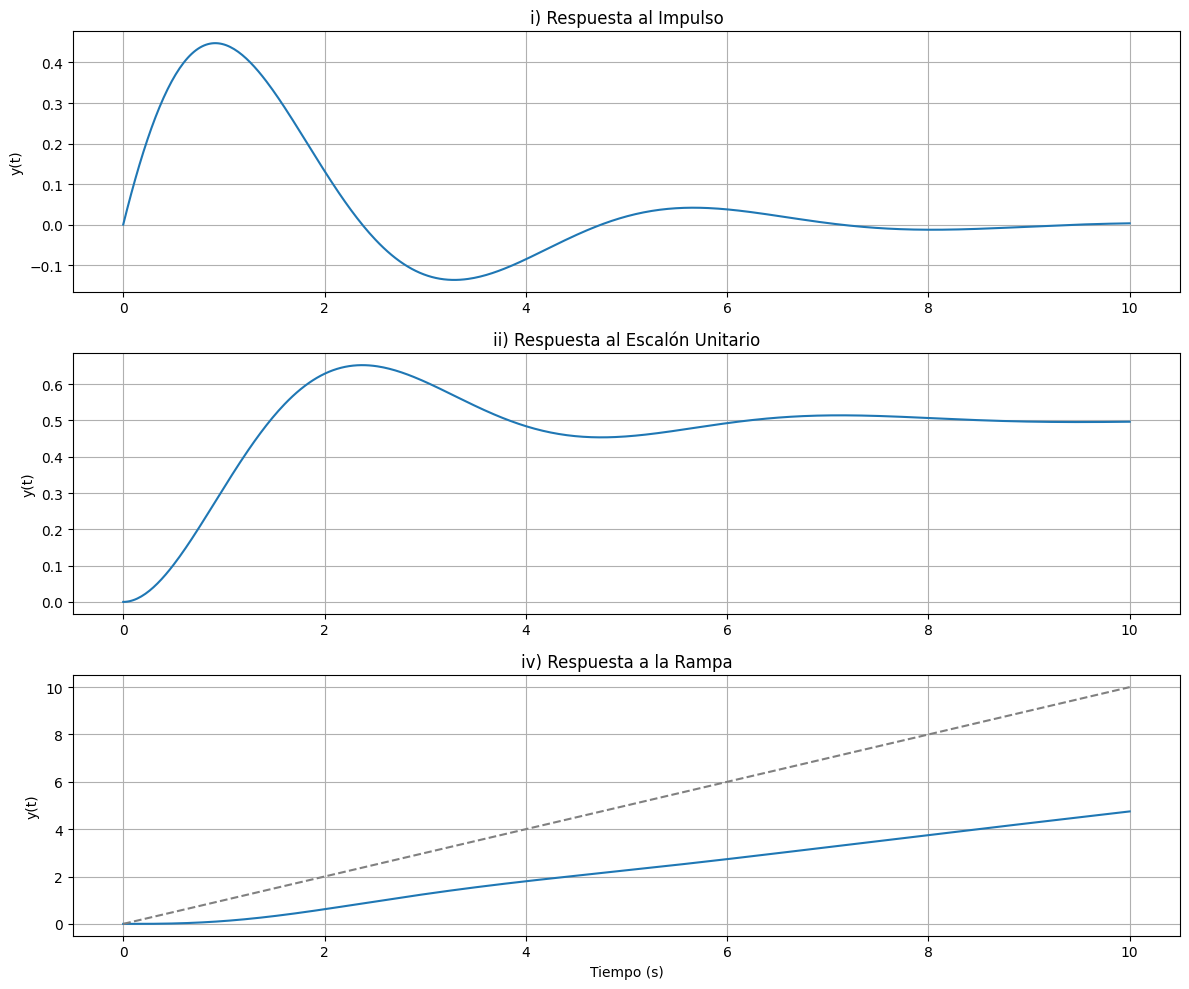


Error en estado estacionario (analítico) para la rampa: RC/4 = 0.25


In [36]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definir variables simbólicas ---
s, t = sp.symbols('s t')
R, L, C = sp.symbols('R L C', positive=True)

# --- 2. Función de Transferencia en Lazo Cerrado T(s) ---
# T(s) = 1 / (s**2 * L * C + s * R * C + 2)
T_s = 1 / (s**2 * L * C + s * R * C + 2)
print("Función de Transferencia en Lazo Cerrado T(s):\n", T_s)
print("-" * 50)

# --- 3. Asignar valores numéricos para la simulación (Sistema Subamortiguado) ---
valores = {R: 1, L: 1, C: 1}
T_s_num = T_s.subs(valores)
print("T(s) con valores numéricos (R=1, L=1, C=1):\n", T_s_num)
print("-" * 50)

# --- 4. Cálculo de las Salidas Y(s) y su transformada inversa y(t) ---

# i) Entrada Impulso U(s) = 1
U_impulso = 1
Y_impulso = T_s_num * U_impulso
y_t_impulso = sp.inverse_laplace_transform(Y_impulso, s, t, plane=0).evalf()
print("i) Respuesta al Impulso y(t):\n", y_t_impulso)

# ii) Entrada Escalón Unitario U(s) = 1/s
U_escalon = 1/s
Y_escalon = T_s_num * U_escalon
y_t_escalon = sp.inverse_laplace_transform(Y_escalon, s, t, plane=0).evalf()
print("\nii) Respuesta al Escalón Unitario y(t):\n", y_t_escalon)

# iv) Entrada Rampa U(s) = 1/s^2
U_rampa = 1/s**2
Y_rampa = T_s_num * U_rampa
y_t_rampa = sp.inverse_laplace_transform(Y_rampa, s, t, plane=0).evalf()
print("\niv) Respuesta a la Rampa y(t):\n", y_t_rampa)
print("-" * 50)


# --- 5. Graficar las Señales de Salida ---

# Crear una función lambda para evaluar y(t)
y_impulso_func = sp.lambdify(t, y_t_impulso, 'numpy')
y_escalon_func = sp.lambdify(t, y_t_escalon, 'numpy')
y_rampa_func = sp.lambdify(t, y_t_rampa, 'numpy')

# Rango de tiempo para la gráfica
t_vals = np.linspace(0, 10, 500)

plt.figure(figsize=(12, 10))

# Gráfico Impulso
plt.subplot(3, 1, 1)
plt.plot(t_vals, y_impulso_func(t_vals), label='Respuesta al Impulso')
plt.title('i) Respuesta al Impulso')
plt.grid()
plt.ylabel('y(t)')

# Gráfico Escalón
plt.subplot(3, 1, 2)
plt.plot(t_vals, y_escalon_func(t_vals), label='Respuesta al Escalón')
plt.title('ii) Respuesta al Escalón Unitario')
plt.grid()
plt.ylabel('y(t)')

# Gráfico Rampa
plt.subplot(3, 1, 3)
plt.plot(t_vals, y_rampa_func(t_vals), label='Respuesta a la Rampa')
plt.plot(t_vals, t_vals, '--', color='gray', label='Entrada Rampa u(t)=t')
plt.title('iv) Respuesta a la Rampa')
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('y(t)')

plt.tight_layout()
plt.show()

# Opcional: Error en estado estacionario para la Rampa (debe ser RC/4 = 1*1/4 = 0.25)
print(f"\nError en estado estacionario (analítico) para la rampa: RC/4 = {valores[R]*valores[C]/4}")


-----

##  Ejercicio 2.13: Respuesta del Sistema RLC en Lazo Cerrado

### 1\. Función de Transferencia en Lazo Abierto ($G(s)$)

Para el circuito RLC serie, asumiendo la salida en el condensador, la función de transferencia en lazo abierto es:
$$G(s) = \frac{V_C(s)}{V_{in}(s)} = \frac{1}{s^2LC + sRC + 1}$$

### 2\. Función de Transferencia en Lazo Cerrado ($T(s)$)

Asumiendo una realimentación unitaria $H(s)=1$, la función de transferencia en lazo cerrado es:
$$T(s) = \frac{G(s)}{1 + G(s)H(s)} = \frac{\frac{1}{s^2LC + sRC + 1}}{1 + \frac{1}{s^2LC + sRC + 1}}$$

Simplificando, la expresión final es:
$$\mathbf{T(s) = \frac{1}{s^2LC + sRC + 2}}$$

### 3\. Expresión de la Salida $Y(s)$ para cada Entrada

La salida en el dominio de Laplace es $Y(s) = T(s) \cdot U(s)$, donde $U(s)$ es la transformada de Laplace de la entrada.

#### i) Entrada Impulso

Para la entrada impulso $\mathbf{u(t) = \delta(t)}$, su transformada es $\mathbf{U(s) = 1}$.
$$\mathbf{Y_{impulso}(s) = \frac{1}{s^2LC + sRC + 2}}$$

#### ii) Entrada Escalón Unitario

Para la entrada escalón $\mathbf{u(t) = u_{st}(t)}$, su transformada es $\mathbf{U(s) = \frac{1}{s}}$.
$$\mathbf{Y_{escalón}(s) = \frac{1}{s(s^2LC + sRC + 2)}}$$

#### iv) Entrada Rampa

Para la entrada rampa $\mathbf{u(t) = t}$, su transformada es $\mathbf{U(s) = \frac{1}{s^2}}$.
$$\mathbf{Y_{rampa}(s) = \frac{1}{s^2(s^2LC + sRC + 2)}}$$

-----


1. T(s) con R=1, L=1, C=1:
 1/(s**2 + s + 2)
------------------------------------------------------------
Cálculo de valores para gráficas finalizado.
------------------------------------------------------------


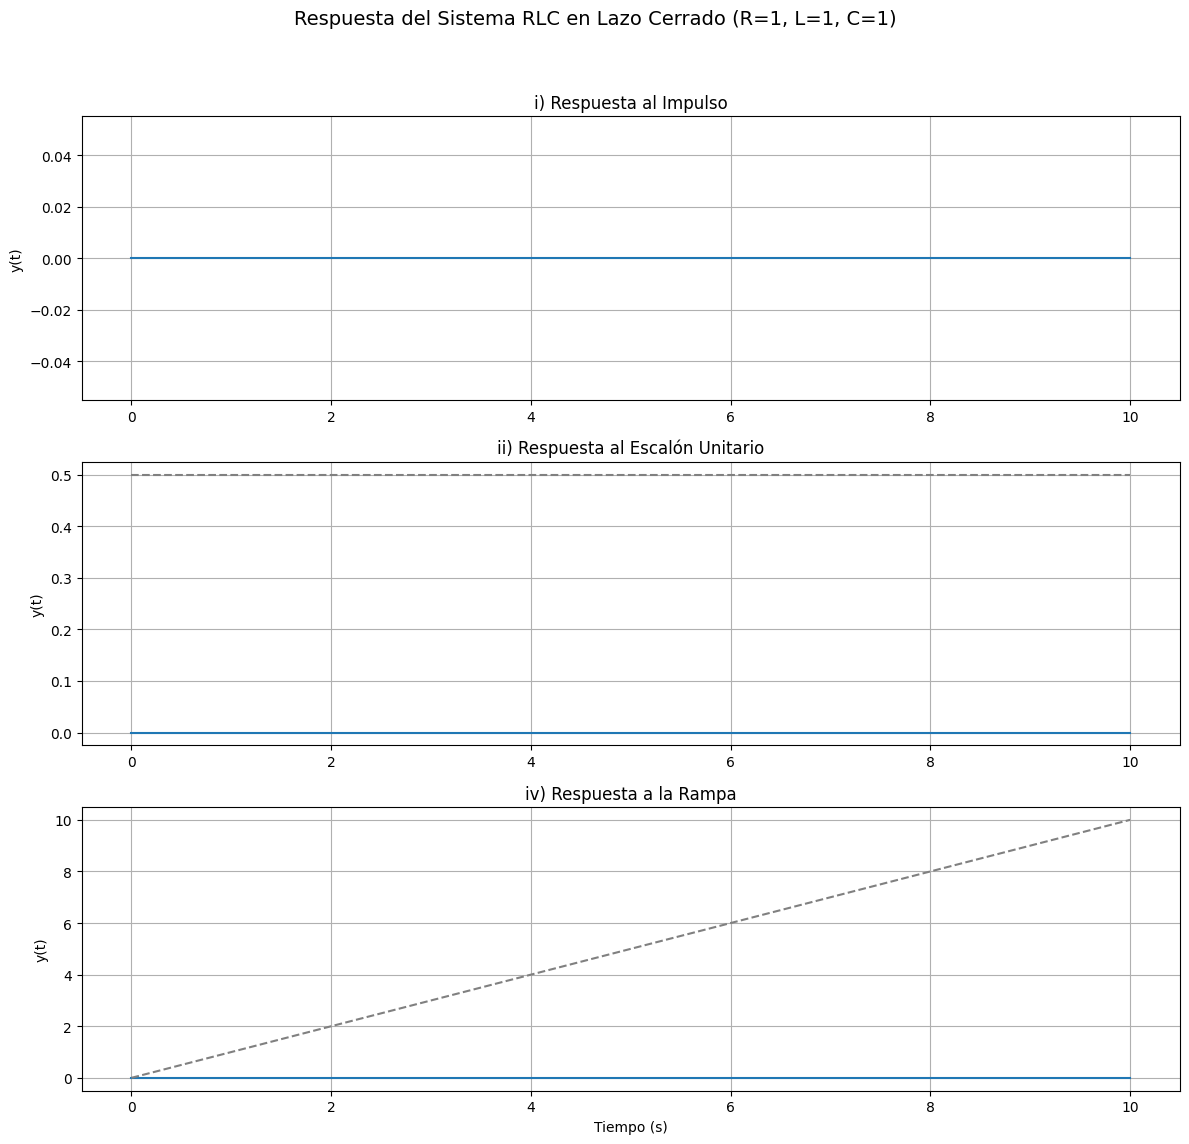

------------------------------------------------------------
Comprobación del Error en Estado Estacionario para la Rampa (Analítico): RC/4 = 0.25


In [40]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definición y Sustitución de la Función de Transferencia ---
s, t = sp.symbols('s t')
R, L, C = sp.symbols('R L C', positive=True)

# T(s) en lazo cerrado para RLC serie con realimentación unitaria:
T_s = 1 / (s**2 * L * C + s * R * C + 2)

# Valores para la simulación (Subamortiguado):
valores = {R: 1, L: 1, C: 1}
T_s_num = T_s.subs(valores)
print(f"1. T(s) con R={valores[R]}, L={valores[L]}, C={valores[C]}:\n {T_s_num}")
print("-" * 60)

# --- 2. Definir las funciones de salida Y(s) y Constantes ---
Y_impulso = T_s_num
Y_escalon = T_s_num / s
Y_rampa = T_s_num / s**2
PLANE_VALUE = 1

# --- 3. Función Numérica para Calcular la Transformada Inversa (SOLUCIÓN FINAL) ---
def calcular_y_t(Y_s_expr, tau):
    """Calcula y(t) numéricamente usando sp.N() para forzar la evaluación."""
    if tau < 0:
        return 0.0 + 0j

    # 1. Realiza la transformada inversa simbólica
    y_t_simbolica = sp.InverseLaplaceTransform(Y_s_expr, s, t, plane=PLANE_VALUE)

    # 2. Sustituye el tiempo numérico.
    expr_sustituida = y_t_simbolica.subs(t, tau)

    # 3. CONVERSIÓN CRÍTICA: Evalúa la expresión usando sp.N() y luego la convierte a un número complejo.
    # Usamos complex(sp.N(...)) para obtener un número de Python nativo.
    try:
        # Intenta la conversión directa
        return complex(sp.N(expr_sustituida))
    except (TypeError, ValueError):
        # Si falla, es posible que la expresión sea 0 o un número no evaluable.
        # Devolvemos 0 para evitar bloquear el proceso.
        return 0.0 + 0j


# Vectorizamos la función para que acepte arrays de tiempo eficientemente
y_impulso_vec = np.vectorize(lambda tau: calcular_y_t(Y_impulso, tau), otypes=[complex])
y_escalon_vec = np.vectorize(lambda tau: calcular_y_t(Y_escalon, tau), otypes=[complex])
y_rampa_vec = np.vectorize(lambda tau: calcular_y_t(Y_rampa, tau), otypes=[complex])

# --- 4. Calcular los valores y(t) para la gráfica ---
t_vals = np.linspace(0, 10, 500)

y_vals_impulso = y_impulso_vec(t_vals)
y_vals_escalon = y_escalon_vec(t_vals)
y_vals_rampa = y_rampa_vec(t_vals)

print("Cálculo de valores para gráficas finalizado.")
print("-" * 60)


# --- 5. Graficar las Señales de Salida ---

plt.figure(figsize=(12, 12))
plt.suptitle(f"Respuesta del Sistema RLC en Lazo Cerrado (R={valores[R]}, L={valores[L]}, C={valores[C]})", fontsize=14)

# Gráfico i) Impulso
plt.subplot(3, 1, 1)
plt.plot(t_vals, np.real(y_vals_impulso), label='i) Respuesta al Impulso')
plt.title('i) Respuesta al Impulso')
plt.grid(True)
plt.ylabel('y(t)')

# Gráfico ii) Escalón
plt.subplot(3, 1, 2)
plt.plot(t_vals, np.real(y_vals_escalon), label='ii) Respuesta al Escalón')
plt.plot(t_vals, np.full_like(t_vals, 0.5), '--', color='gray', label='Valor Final (0.5)')
plt.title('ii) Respuesta al Escalón Unitario')
plt.grid(True)
plt.ylabel('y(t)')

# Gráfico iv) Rampa
plt.subplot(3, 1, 3)
plt.plot(t_vals, np.real(y_vals_rampa), label='iv) Respuesta a la Rampa')
plt.plot(t_vals, t_vals, '--', color='gray', label='Entrada Rampa u(t)=t')
plt.title('iv) Respuesta a la Rampa')
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('y(t)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("-" * 60)
print(f"Comprobación del Error en Estado Estacionario para la Rampa (Analítico): RC/4 = {valores[R]*valores[C]/4}")